# Trabajo Práctico de Inteligencia Artificial Aplicada: Aplicación de IA

**Carrera**: Ingenieria en Informatica

**Universidad**: Universidad Nacional de La Matanza

**Materia:** Inteligencia Artificial Aplicada

**Cuatrimestre**: Primer Cuatrimestre

**Año**: 2024

**Grupo:** 3

**Integrantes:**


*   Di Nicco, Luis Demetrio
*   Vivas,Pablo Ezequiel
*   Corrales, Mauro Exequiel
*   López Ferme, Nahuel Ezequiel
*   Becerra, Diego Ezequiel

**Profesores:**
*  Becerra, Martin Ezequiel
*  Ierache, Jorge
*  Sanz, Diego Ruben


# Introducción al Prototipo del Planificador de Materias

## Descripcion General

En este proyecto se desarrollará un planificador, el cual se encargará de generar una recomendacion de materias y horarios para un estudiante de la carrera de Ingenieria Informatica (plan 2023) de la Universidad Nacional de la Matanza.

## Dominio

Nuestro proyecto se centrará en el ámbito educativo, con un enfoque específico en la Universidad Nacional de la Matanza (UNLaM).

Esta institución académica, reconocida por su compromiso con la excelencia educativa y la innovación, servirá como el contexto principal para nuestro trabajo. La UNLaM, ubicada en San Justo, provincia de Buenos Aires, Argentina, es un centro educativo de renombre que ofrece una amplia gama de programas de grado y posgrado en diversas disciplinas. En este proyecto se hará foco en la carrera de grado Ingenieria en Informatica.

## Objetivo

Nuestro objetivo es colaborar con una porción importante de la comunidad universitaria, buscando proporcionar una cursada más acorde a la disponibilidad horaria y situacion laboral de cada persona, con el fin de garantizar la mayor probabilidad de exito posible.

## Requisitos

Para poder utilizar el planificador de materias se requiere que el usuario suba un archivo pdf con la **Oferta de Materias** correspondiente al cuatrimestre actual.

Adicionalmente, si el usuario cuenta con una **Historia Academica**, es decir, tiene materias aprobadas correspondientes al plan 2023 de Ingenieria Informatica, debe subir un archivo con su historia académica.

En caso de no saber como obtener estos 2 archivos, puede consultar:

* La seccion "Tutorial para obtener la oferta de materias en PDF" y
* La seccion "Tutorial para cargar el archivo pdf de la Oferta de Materias a Google Colab"

Para subir el archivo de la oferta de materias.

Y puede consultar:
* La seccion "Tutorial para obtener la Historia Academica del usuario en PDF" y
* La seccion "Tutorial para cargar el archivo pdf de la Historia Academica a Google Colab"

Para subir el archivo de la historia academica, en caso de que corresponda.

**IMPORTANTE:** El nombre del archivo de la oferta de materias debe ser "*OfertaMaterias*" y el nombre del archivo de la historia academica debe ser "*HistoriaAcademica*"

# PARTE 0: Descarga e Importacion de Librerias

En esta parte descargaremos e importaremos todas las librerias que usaremos en el desarrollo del colab.

## Descargas

In [ ]:
#Libreria para leer los archivos PDF
!pip install pdfplumber

## Imports

In [ ]:
import random                                             # Para generar números aleatorios y realizar operaciones aleatorias.
import networkx as nx                                     # Para la creación, manipulación y estudio de estructuras, grafos y funciones de redes complejas.
import matplotlib.pyplot as plt                           # Para crear gráficos y visualizaciones a partir de datos.
from collections import Counter                           # Para contar elementos
import csv                                                # Para leer y escribir archivos CSV.
import pdfplumber                                         # Para extraer texto, tablas e imágenes de archivos PDF.
import os                                                 # Para validar si un archivo esta subido
from copy import deepcopy                                 # Para realizar copias profundas de objetos, útil para evitar referencias no deseadas entre objetos.
import numpy as np                                        # Para realizar la normalizacion de la aptitud con la funcion sigmoide y para implementar la red neuronal
import tensorflow as tf                                   # Para implementar la red neuronal
import pandas as pd                                       # Para implementar la red neuronal
from tensorflow.keras import layers                       # Para implementar la red neuronal
from tensorflow.keras.callbacks import EarlyStopping      # Para mejorar el entrenamiento de la red neuronal

# PARTE 1: Procesamiento del Plan de Carrera

En esta parte se estableceran las bases para hacer la recomendacion.


*   Se procesará el Plan 2023 de la Carrera de Ingenieria Informatica, incluyendo algunos datos adicionales como la dificultad de cada materia y las horas de estudio que requieren.
*   Se creará un grafo de correlativas para facilitar el manejo de materias.



## Paso 1.A) Cargar las Materias al Colab

Clase Materia

In [ ]:
#Clase Materia
class Materia:
    def __init__(self, codigo, nombre, dificultad, horas_clase, horas_estudio, horas_practica, rama, año):
        self.codigo = codigo
        self.nombre = nombre
        self.dificultad = dificultad
        self.horas_clase = horas_clase
        self.horas_estudio = horas_estudio
        self.horas_practica = horas_practica
        self.rama = rama
        self.año = año

mapa_materias es una estructura tipo Map con toda la informacion de las materias.

Contiene la siguiente informacion de las materias:


*   Codigo de Materia (campo clave)
*   Nombre de la Materia
*   Dificultad de la Materia
*   Horas semanales de clase (virtuales y/o presenciales)
*   Horas semanales que requieren destinadas al estudio.
*   Horas semanales que requieren destinadas a la práctica
*   A que rama pertenece
*   A que año pertenece

**ACLARACIÓN:** La información de las materias están actualizadas hasta el Primer Cuatrimestre del Año 2024 (1C2024). En caso de que en un futuro se agreguen nuevas materias electivas con nuevos codigos de materias, deberá agregar la informacion correspondiente a este archivo de colab.




In [ ]:
#Mapa de Materias
mapa_materias = {
    "3621": {"nombre": "Matemática Discreta", "dificultad": 4, "horas_clase": 4, "horas_estudio": 2, "horas_practica": 2, "rama": "Ciencias Básicas", "año": "1"},
    "3622": {"nombre": "Análisis Matemático I", "dificultad": 9, "horas_clase": 4, "horas_estudio": 3, "horas_practica": 4, "rama": "Ciencias Básicas", "año": "1"},
    "3623": {"nombre": "Programación Inicial", "dificultad": 5, "horas_clase": 4, "horas_estudio": 1, "horas_practica": 4, "rama": "Programación", "año": "1"},
    "3624": {"nombre": "Introducción a los Sistemas de Información", "dificultad": 4, "horas_clase": 4, "horas_estudio": 2, "horas_practica": 2, "rama": "Desarrollo de SW", "año": "1"},
    "3625": {"nombre": "Sistemas de Numeración", "dificultad": 4, "horas_clase": 4, "horas_estudio": 2, "horas_practica": 2, "rama": "Infraestructura", "año": "1"},
    "3626": {"nombre": "Principios de Calidad de Software", "dificultad": 1, "horas_clase": 4, "horas_estudio": 2, "horas_practica": 1, "rama": "Calidad y Seguridad de la Información", "año": "1"},
    "3627": {"nombre": "Álgebra y Geometría Analítica I", "dificultad": 7, "horas_clase": 4, "horas_estudio": 3, "horas_practica": 3, "rama": "Ciencias Básicas", "año": "1"},
    "3628": {"nombre": "Física I", "dificultad": 8, "horas_clase": 4, "horas_estudio": 3, "horas_practica": 4, "rama": "Ciencias Básicas", "año": "1"},
    "3629": {"nombre": "Programación Estructurada Básica", "dificultad": 6, "horas_clase": 4, "horas_estudio": 1, "horas_practica": 4, "rama": "Programación", "año": "1"},
    "3630": {"nombre": "Introducción a la Gestión de Requisitos", "dificultad": 5, "horas_clase": 4, "horas_estudio": 2, "horas_practica": 2, "rama": "Desarrollo de SW", "año": "1"},
    "3631": {"nombre": "Fundamentos de Sistemas Embebidos", "dificultad": 5, "horas_clase": 4, "horas_estudio": 2, "horas_practica": 2, "rama": "Infraestructura", "año": "1"},
    "3632": {"nombre": "Introducción a los Proyectos Informáticos", "dificultad": 3, "horas_clase": 4, "horas_estudio": 2, "horas_practica": 1, "rama": "Gestión y Complementarias", "año": "1"},
    "3633": {"nombre": "Análisis Matemático II", "dificultad": 10, "horas_clase": 4, "horas_estudio": 3, "horas_practica": 5, "rama": "Ciencias Básicas", "año": "2"},
    "3634": {"nombre": "Física II", "dificultad": 9, "horas_clase": 4, "horas_estudio": 4, "horas_practica": 4, "rama": "Ciencias Básicas", "año": "2"},
    "3635": {"nombre": "Tópicos de Programación", "dificultad": 9, "horas_clase": 4, "horas_estudio": 2, "horas_practica": 4, "rama": "Programación", "año": "2"},
    "3636": {"nombre": "Bases de Datos", "dificultad": 7, "horas_clase": 4, "horas_estudio": 2, "horas_practica": 4, "rama": "Programación", "año": "2"},
    "3637": {"nombre": "Análisis de Sistemas", "dificultad": 6, "horas_clase": 4, "horas_estudio": 2, "horas_practica": 3, "rama": "Desarrollo de SW", "año": "2"},
    "3638": {"nombre": "Arquitectura de Computadoras", "dificultad": 6, "horas_clase": 4, "horas_estudio": 3, "horas_practica": 3, "rama": "Infraestructura", "año": "2"},
    "3676": {"nombre": "Responsabilidad Social Universitaria", "dificultad": 2, "horas_clase": 4, "horas_estudio": 2, "horas_practica": 1, "rama": "Otras", "año": "2"},
    "3639": {"nombre": "Análisis Matemático III", "dificultad": 6, "horas_clase": 4, "horas_estudio": 3, "horas_practica": 3, "rama": "Ciencias Básicas", "año": "2"},
    "3640": {"nombre": "Algoritmos y Estructuras de Datos", "dificultad": 10, "horas_clase": 4, "horas_estudio": 2, "horas_practica": 4, "rama": "Programación", "año": "2"},
    "3641": {"nombre": "Bases de Datos Aplicadas", "dificultad": 7, "horas_clase": 4, "horas_estudio": 3, "horas_practica": 4, "rama": "Programación", "año": "2"},
    "3642": {"nombre": "Principios de Diseño de Sistemas", "dificultad": 7, "horas_clase": 4, "horas_estudio": 3, "horas_practica": 3, "rama": "Desarrollo de SW", "año": "2"},
    "3643": {"nombre": "Redes de Computadoras", "dificultad": 7, "horas_clase": 4, "horas_estudio": 2, "horas_practica": 3, "rama": "Infraestructura", "año": "2"},
    "3644": {"nombre": "Gestión de las Organizaciones", "dificultad": 4, "horas_clase": 4, "horas_estudio": 6, "horas_practica": 1, "rama": "Gestión y Complementarias", "año": "2"},
    "3680": {"nombre": "Taller de Integración", "dificultad": 3, "horas_clase": 4, "horas_estudio": 2, "horas_practica": 2, "rama": "Otras", "año": "2"},
    "3645": {"nombre": "Álgebra y Geometría Analítica II", "dificultad": 6, "horas_clase": 4, "horas_estudio": 2, "horas_practica": 3, "rama": "Ciencias Básicas", "año": "3"},
    "3646": {"nombre": "Paradigmas de Programación", "dificultad": 8, "horas_clase": 4, "horas_estudio": 2, "horas_practica": 5, "rama": "Programación", "año": "3"},
    "3647": {"nombre": "Requisitos Avanzados", "dificultad": 4, "horas_clase": 4, "horas_estudio": 1, "horas_practica": 4, "rama": "Desarrollo de SW", "año": "3"},
    "3648": {"nombre": "Diseño de Software", "dificultad": 9, "horas_clase": 4, "horas_estudio": 4, "horas_practica": 4, "rama": "Desarrollo de SW", "año": "3"},
    "3649": {"nombre": "Sistemas Operativos", "dificultad": 9, "horas_clase": 4, "horas_estudio": 4, "horas_practica": 3, "rama": "Infraestructura", "año": "3"},
    "3650": {"nombre": "Seguridad de la Información", "dificultad": 3, "horas_clase": 4, "horas_estudio": 3, "horas_practica": 1, "rama": "Calidad y Seguridad de la Información", "año": "3"},
    "3675": {"nombre": "Práctica Profesional Supervisada", "dificultad": 1, "horas_clase": 4, "horas_estudio": 1, "horas_practica": 1, "rama": "Otras", "año": "3"},
    "3651": {"nombre": "Probabilidad y Estadística", "dificultad": 7, "horas_clase": 4, "horas_estudio": 3, "horas_practica": 3, "rama": "Ciencias Básicas", "año": "3"},
    "3652": {"nombre": "Programación Avanzada", "dificultad": 8, "horas_clase": 4, "horas_estudio": 2, "horas_practica": 4, "rama": "Programación", "año": "3"},
    "3653": {"nombre": "Arquitectura de Sistemas Software", "dificultad": 6, "horas_clase": 4, "horas_estudio": 3, "horas_practica": 3, "rama": "Desarrollo de SW", "año": "3"},
    "3654": {"nombre": "Virtualización de Hardware", "dificultad": 9, "horas_clase": 4, "horas_estudio": 2, "horas_practica": 6, "rama": "Infraestructura", "año": "3"},
    "3655": {"nombre": "Auditoria y Legislación", "dificultad": 4, "horas_clase": 4, "horas_estudio": 3, "horas_practica": 1, "rama": "Calidad y Seguridad de la Información", "año": "3"},
    "3656": {"nombre": "Estadística Aplicada", "dificultad": 7, "horas_clase": 4, "horas_estudio": 3, "horas_practica": 3, "rama": "Ciencias Básicas", "año": "4"},
    "3657": {"nombre": "Autómatas y Gramáticas", "dificultad": 7, "horas_clase": 4, "horas_estudio": 3, "horas_practica": 3, "rama": "Programación", "año": "4"},
    "3658": {"nombre": "Programación Concurrente", "dificultad": 8, "horas_clase": 4, "horas_estudio": 3, "horas_practica": 4, "rama": "Infraestructura", "año": "4"},
    "3659": {"nombre": "Gestión Aplic. al Des. de Software I", "dificultad": 6, "horas_clase": 4, "horas_estudio": 2, "horas_practica": 3, "rama": "Desarrollo de SW", "año": "4"},
    "3660": {"nombre": "Sistemas Operativos Avanzados", "dificultad": 8, "horas_clase": 4, "horas_estudio": 3, "horas_practica": 4, "rama": "Infraestructura", "año": "4"},
    "3661": {"nombre": "Gestión de Proyectos", "dificultad": 5, "horas_clase": 4, "horas_estudio": 2, "horas_practica": 4, "rama": "Gestión y Complementarias", "año": "4"},
    "3662": {"nombre": "Matemática Aplicada", "dificultad": 7, "horas_clase": 4, "horas_estudio": 2, "horas_practica": 3, "rama": "Ciencias Básicas", "año": "4"},
    "3663": {"nombre": "Lenguajes y Compiladores", "dificultad": 8, "horas_clase": 4, "horas_estudio": 2, "horas_practica": 4, "rama": "Programación", "año": "4"},
    "3664": {"nombre": "Inteligencia Artificial", "dificultad": 6, "horas_clase": 4, "horas_estudio": 4, "horas_practica": 1, "rama": "Desarrollo de SW", "año": "4"},
    "3665": {"nombre": "Gestión Aplicada al Desarrollo de Software II", "dificultad": 6, "horas_clase": 4, "horas_estudio": 2, "horas_practica": 3, "rama": "Desarrollo de SW", "año": "4"},
    "3666": {"nombre": "Seguridad Aplicada y Forensia", "dificultad": 4, "horas_clase": 4, "horas_estudio": 3, "horas_practica": 1, "rama": "Calidad y Seguridad de la Información", "año": "4"},
    "3667": {"nombre": "Gestión de la Calidad en Procesos de Sistemas", "dificultad": 6, "horas_clase": 4, "horas_estudio": 2, "horas_practica": 3, "rama": "Calidad y Seguridad de la Información", "año": "4"},
    "3668": {"nombre": "Inteligencia Artificial Aplicada", "dificultad": 7, "horas_clase": 4, "horas_estudio": 2, "horas_practica": 4, "rama": "Desarrollo de SW", "año": "5"},
    "3669": {"nombre": "Innovacion y Emprendedorismo", "dificultad": 5, "horas_clase": 4, "horas_estudio": 3, "horas_practica": 2, "rama": "Gestión y Complementarias", "año": "5"},
    "3670": {"nombre": "Ciencia de Datos", "dificultad": 8, "horas_clase": 4, "horas_estudio": 3, "horas_practica": 3, "rama": "Desarrollo de SW", "año": "5"},
    "3671": {"nombre": "Proyecto Final de Carrera", "dificultad": 10, "horas_clase": 4, "horas_estudio": 1, "horas_practica": 8, "rama": "Desarrollo de SW", "año": "5"},
    "3672": {"nombre": "Electiva I", "dificultad": 5, "horas_clase": 4, "horas_estudio": 2, "horas_practica": 2, "rama": "Desarrollo de SW", "año": "5"},
    "3673": {"nombre": "Electiva II", "dificultad": 6, "horas_clase": 4, "horas_estudio": 3, "horas_practica": 2, "rama": "Desarrollo de SW", "año": "5"},
    "3674": {"nombre": "Electiva III", "dificultad": 5, "horas_clase": 4, "horas_estudio": 2, "horas_practica": 3, "rama": "Desarrollo de SW", "año": "5"},
    "3677": {"nombre": "Lenguaje Orientado a Negocios", "dificultad": 5, "horas_clase": 4, "horas_estudio": 2, "horas_practica": 2, "rama": "Desarrollo de SW", "año": "5"},
    "3678": {"nombre": "Tecnologías en Seguridad", "dificultad": 6, "horas_clase": 4, "horas_estudio": 3, "horas_practica": 2, "rama": "Desarrollo de SW", "año": "5"},
    "3679": {"nombre": "Visión Artificial", "dificultad": 5, "horas_clase": 4, "horas_estudio": 2, "horas_practica": 3, "rama": "Desarrollo de SW", "año": "5"},
    "901": {"nombre": "Inglés Transversal Nivel I", "dificultad": 1, "horas_clase": 4, "horas_estudio": 2, "horas_practica": 2, "rama": "Transversal", "año": "T"},
    "902": {"nombre": "Inglés Transversal Nivel II", "dificultad": 3, "horas_clase": 4, "horas_estudio": 2, "horas_practica": 2, "rama": "Transversal", "año": "T"},
    "903": {"nombre": "Inglés Transversal Nivel III", "dificultad": 2, "horas_clase": 4, "horas_estudio": 2, "horas_practica": 2, "rama": "Transversal", "año": "T"},
    "904": {"nombre": "Inglés Transversal Nivel IV", "dificultad": 2, "horas_clase": 4, "horas_estudio": 2, "horas_practica": 2, "rama": "Transversal", "año": "T"},
    "911": {"nombre": "Computación Transversal Nivel I", "dificultad": 2, "horas_clase": 4, "horas_estudio": 1, "horas_practica": 3, "rama": "Transversal", "año": "T"},
    "912": {"nombre": "Computación Transversal Nivel II", "dificultad": 3, "horas_clase": 4, "horas_estudio": 1, "horas_practica": 3, "rama": "Transversal", "año": "T"}
}

Grafico para mostrar la dificultad de las materias

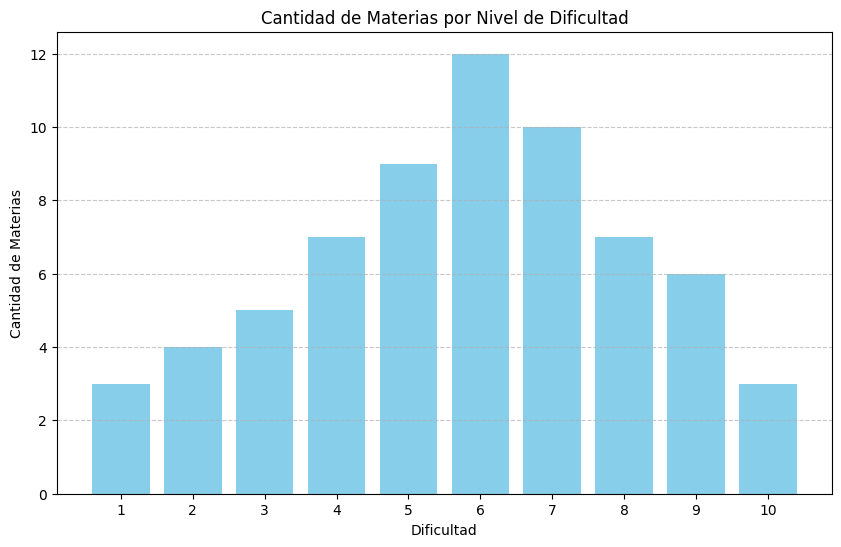

In [ ]:
# Inicializo el diccionario de conteo de dificultades
dificultades = {i: 0 for i in range(1, 11)}

# Cuento las materias por dificultad
for materia in mapa_materias.values():
    dificultad = materia["dificultad"]
    dificultades[dificultad] += 1

# Creo un gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(dificultades.keys(), dificultades.values(), color='skyblue')
plt.xlabel('Dificultad')
plt.ylabel('Cantidad de Materias')
plt.title('Cantidad de Materias por Nivel de Dificultad')
plt.xticks(range(1, 11))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Grafico para mostrar las horas semanales que requieren cada materia

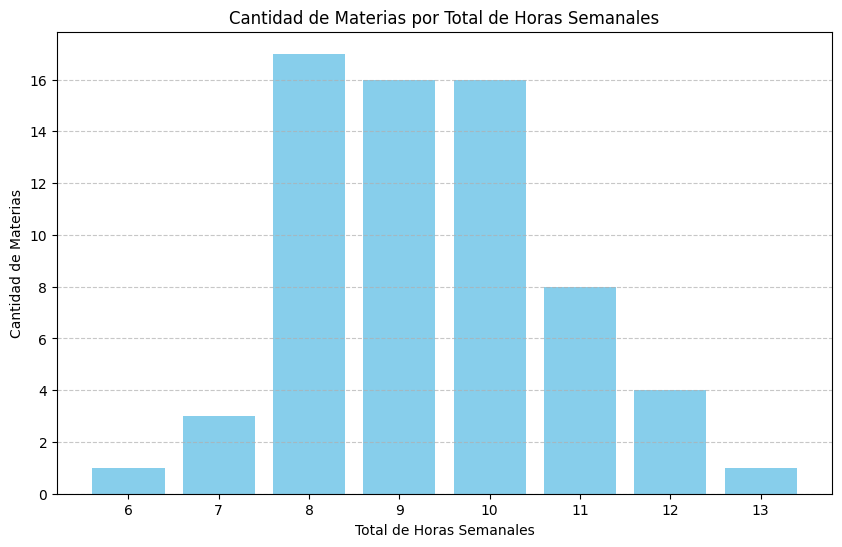

In [ ]:
# Inicializo el diccionario de conteo de horas
horas_totales = {}

# Cuento las materias por suma de horas
for materia in mapa_materias.values():
    total_horas = materia["horas_clase"] + materia["horas_estudio"] + materia["horas_practica"]
    if total_horas not in horas_totales:
        horas_totales[total_horas] = 0
    horas_totales[total_horas] += 1

# Creo gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(horas_totales.keys(), horas_totales.values(), color='skyblue')
plt.xlabel('Total de Horas Semanales')
plt.ylabel('Cantidad de Materias')
plt.title('Cantidad de Materias por Total de Horas Semanales')
plt.xticks(sorted(horas_totales.keys()))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Paso 1.B) Creación del grafo de Correlatividad

grafo_correlatividades como su nombre lo indica, es una estructura tipo grafo que muestra la correlatividad entre materias.

In [ ]:
# Creamos un grafo dirigido
grafo_correlatividades = nx.DiGraph()

# Lista de materias con sus datos (Codigo Materia, Nombre, Correlativas)
materias_datos = [
    ("3621", "Matemática Discreta", "---"),
    ("3622", "Análisis Matemático I", "---"),
    ("3623", "Programación Inicial", "---"),
    ("3624", "Introducción a los Sistemas de Información", "---"),
    ("3625", "Sistemas de Numeración", "---"),
    ("3626", "Principios de Calidad de Software", "---"),
    ("3627", "Álgebra y Geometría Analítica I", "---"),
    ("3628", "Física I", "3622"),
    ("3629", "Programación Estructurada Básica", "3623"),
    ("3630", "Introducción a la Gestión de Requisitos", "3624"),
    ("3631", "Fundamentos de Sistemas Embebidos", "3625"),
    ("3632", "Introducción a los Proyectos Informáticos", "---"),
    ("3633", "Análisis Matemático II", "3622"),
    ("3634", "Física II", "3628"),
    ("3635", "Tópicos de Programación", "3629 / 3621"),
    ("3636", "Bases de Datos", "3629 / 3621"),
    ("3637", "Análisis de Sistemas", "3630"),
    ("3638", "Arquitectura de Computadoras", "3631"),
    ("3676", "Responsabilidad Social Universitaria", "3626"),
    ("3639", "Análisis Matemático III", "3633"),
    ("3640", "Algoritmos y Estructuras de Datos", "3635"),
    ("3641", "Bases de Datos Aplicadas", "3636"),
    ("3642", "Principios de Diseño de Sistemas", "3637 / 3626"),
    ("3643", "Redes de Computadoras", "3638 / 3634"),
    ("3644", "Gestión de las Organizaciones", "3632"),
    ("3680", "Taller de Integración", "3638 / 3636 / 3635 / 3632 / 3630 / 3626 / 3625 / 3624 / 3623 / 3621"),
    ("3645", "Álgebra y Geometría Analítica II", "3627"),
    ("3646", "Paradigmas de Programación", "3640 / 3633"),
    ("3647", "Requisitos Avanzados", "3642"),
    ("3648", "Diseño de Software", "3642 / 3636"),
    ("3649", "Sistemas Operativos", "3638"),
    ("3650", "Seguridad de la Información", "3643 / 3638 / 3635"),
    ("3675", "Práctica Profesional Supervisada", "3642"),
    ("3651", "Probabilidad y Estadística", "3645 / 3639 / 3621"),
    ("3652", "Programación Avanzada", "3641 / 3646"),
    ("3653", "Arquitectura de Sistemas Software", "3648"),
    ("3654", "Virtualización de Hardware", "3649 / 3645 / 3640"),
    ("3655", "Auditoria y Legislación", "3650"),
    ("3656", "Estadística Aplicada", "3651 / 3641"),
    ("3657", "Autómatas y Gramáticas", "3646"),
    ("3658", "Programación Concurrente", "3654 / 3646"),
    ("3659", "Gestión Aplic. al Des. de Software I", "3653 / 3647 / 3644"),
    ("3660", "Sistemas Operativos Avanzados", "3654"),
    ("3661", "Gestión de Proyectos", "3651 / 3650 / 3644"),
    ("3662", "Matemática Aplicada", "3651"),
    ("3663", "Lenguajes y Compiladores", "3657"),
    ("3664", "Inteligencia Artificial", "3651 / 3646"),
    ("3665", "Gestión Aplicada al Desarrollo de Software II", "3659 / 3652"),
    ("3666", "Seguridad Aplicada y Forensia", "3655 / 3652 / 3649"),
    ("3667", "Gestión de la Calidad en Procesos de Sistemas", "3647"),
    ("3668", "Inteligencia Artificial Aplicada", "3664 / 3656"),
    ("3669", "Innovacion y Emprendedorismo", "3661"),
    ("3670", "Ciencia de Datos", "3664 / 3656"),
    ("3671", "Proyecto Final de Carrera", "3667 / 3661 / 3660 / 3659 / 3656"),
    ("3672", "Electiva I", "3658 / 3661 / 3663"),
    ("3673", "Electiva II", "3662 / 3666"),
    ("3674", "Electiva III", "3664 / 3665"),
    ("3677", "Lenguaje Orientado a Negocios", "3658 / 3661 / 3663"),
    ("3678", "Tecnologías en Seguridad", "3662 / 3666"),
    ("3679", "Visión Artificial", "3664 / 3665"),
    ("901", "Inglés Transversal Nivel I", "---"),
    ("902", "Inglés Transversal Nivel II", "901"),
    ("903", "Inglés Transversal Nivel III", "902"),
    ("904", "Inglés Transversal Nivel IV", "903"),
    ("911", "Computación Transversal Nivel I", "---"),
    ("912", "Computación Transversal Nivel II", "911")
]

# Creamos nodos y arcos en el grafo según las correlatividades
for codigo, nombre, correlatividad in materias_datos:
    grafo_correlatividades.add_node(codigo)
    if correlatividad != "---":
        correlativas = correlatividad.split("/")
        for correlativa in correlativas:
            grafo_correlatividades.add_edge(correlativa.strip(), codigo)  # Aplicamos strip() al código de correlatividad

Muestra de como quedó el grafo de correlatividad entre materias

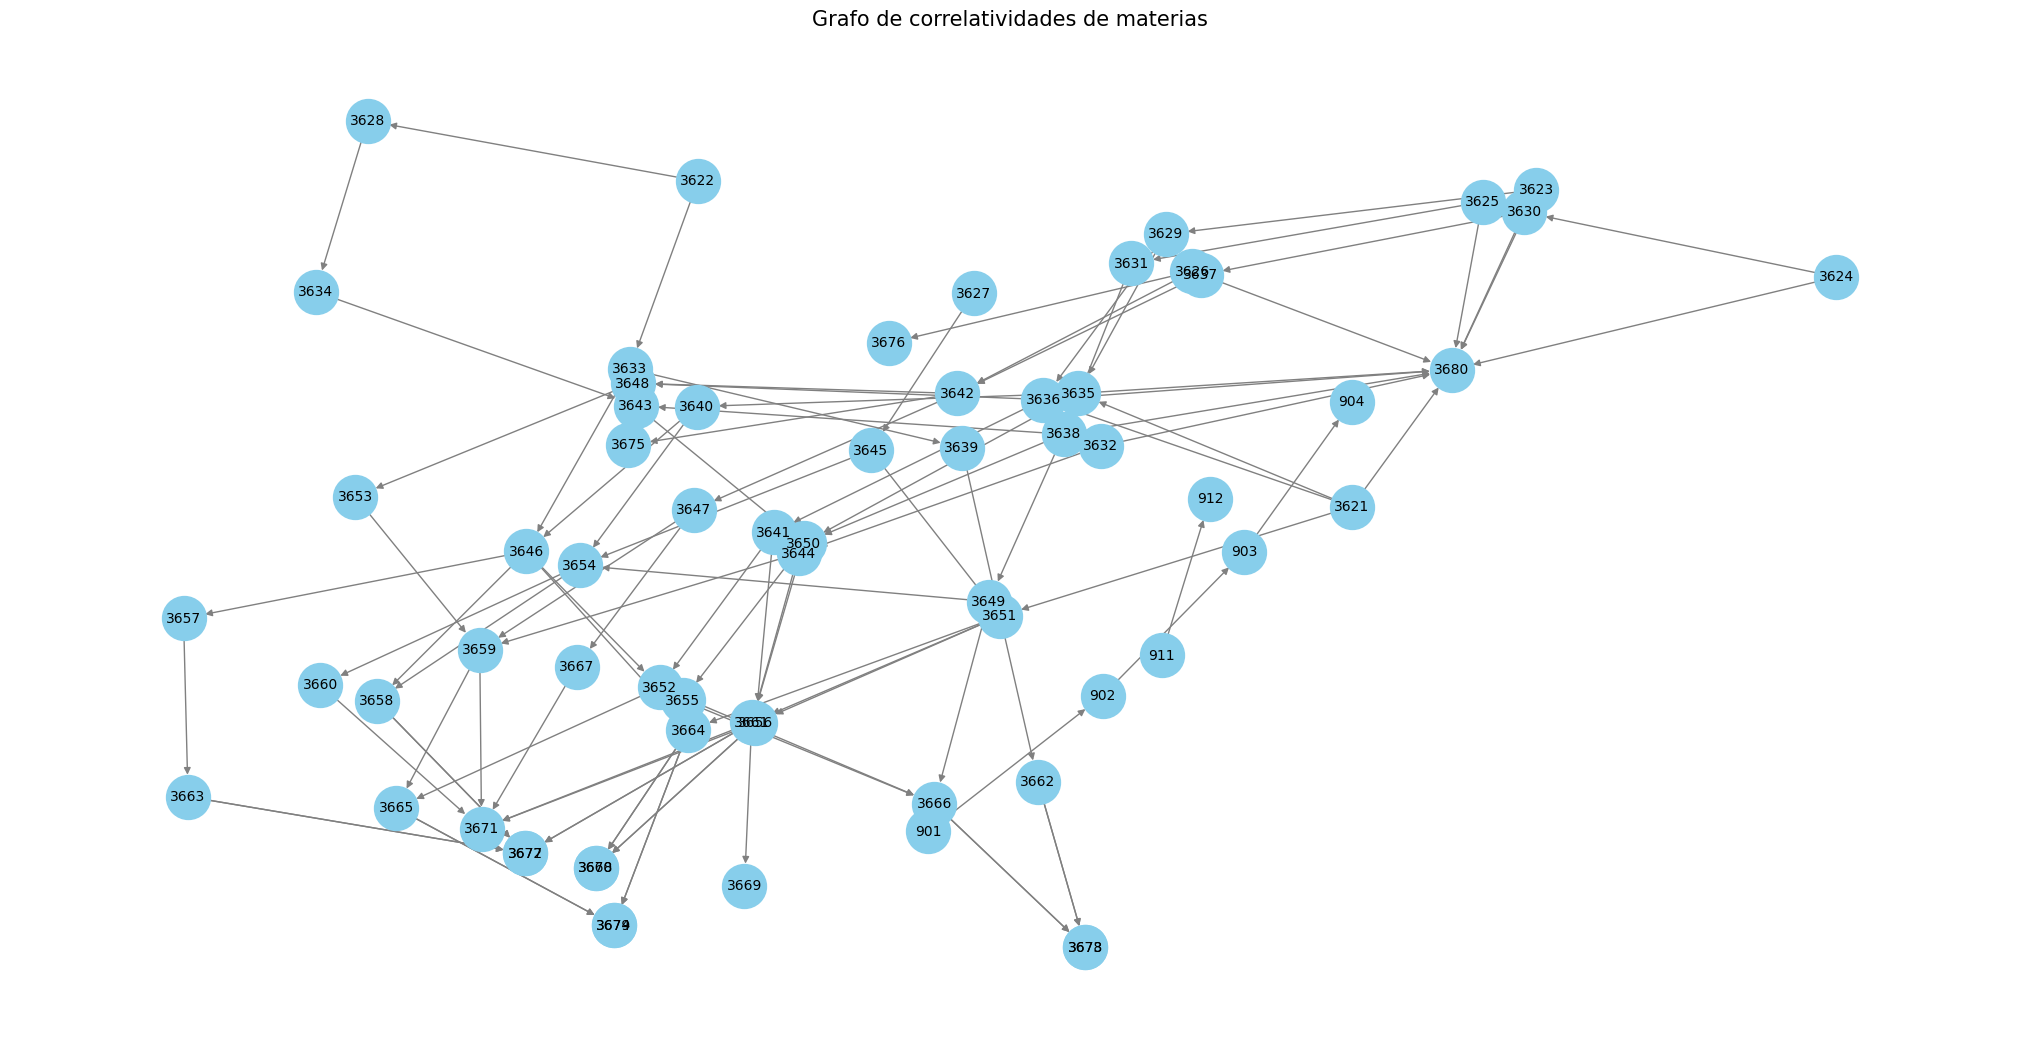

In [ ]:
# Para crear una imagen más grande
plt.figure(figsize=(20, 10))

# Dibuja el grafo dirigido con el algoritmo Kamada-Kawai
pos = nx.kamada_kawai_layout(grafo_correlatividades)  # Calcula las posiciones de los nodos con el algoritmo Kamada-Kawai
nx.draw(grafo_correlatividades, pos, with_labels=True, node_size=1000, node_color="skyblue", font_size=10, edge_color="gray")
plt.title("Grafo de correlatividades de materias", fontsize=15)
plt.show()

## Paso 1.C) Funciones para trabajar con materias

Aca se definen una serie de funciones para trabajar con materias y sus correlativas que serán utiles durante la ejecución de los algoritmos genéticos.

Funcion para conocer cuantas materias (como maximo) puede llegar a desbloquear el proximo cuatrimestre en caso de aprobar esta materia

In [ ]:
# Materias inmediatas que se desbloquean (Cantidad maxima que puede llegar a desbloquear)
def contar_materias_inmediatas(materia_aprobada, grafo):
    materias_inmediatas = set()
    if materia_aprobada in grafo:
        sucesores = grafo.successors(materia_aprobada)
        for sucesor in sucesores:
            materias_inmediatas.add(sucesor)
    return len(materias_inmediatas)

Ejemplo de uso

In [ ]:
# Ejemplo de cómo usar la función: contar_materias_inmediatas
materia_actual = "3622" # analisis matematico 1
cantidad_inmediata = contar_materias_inmediatas(materia_actual, grafo_correlatividades)
print(f"La materia: '{materia_actual}', desbloquea el proximo cuatrimestre: '{cantidad_inmediata}' materias")

La materia: '3622', desbloquea el proximo cuatrimestre: '2' materias


Funcion para contar cuantas materias en total desbloquea

In [ ]:
# Función para contar todas las materias desbloqueadas por un historial de materias aprobadas
def contar_todas_materias_desbloqueadas(materia, grafo):
    # Utilizar la función descendants para obtener todas las materias desbloqueadas
    desbloqueadas = nx.descendants(grafo, materia)

    # Retornar la cantidad de materias desbloqueadas
    return len(desbloqueadas)

Ejemplo de uso

In [ ]:
# Ejemplo de cómo usar la función: contar_todas_materias_desbloqueadas
materia_actual = "3622" # analisis matematico 1
cantidad_total = contar_todas_materias_desbloqueadas(materia_actual, grafo_correlatividades)
print(f"La materia: '{materia_actual}', desbloquea en total: '{cantidad_total}' materias")

La materia: '3622', desbloquea en total: '29' materias


Funcion para validar si un alumno puede cursar una materia

In [ ]:
# Funcion para validar si se puede cursar una materia
def todas_correlativas_aprobadas(materia, materias_aprobadas):
    ancestros_directos = grafo_correlatividades.predecessors(materia) #Con predecessors solo evaluas los padres directos
    return all(correlativa in materias_aprobadas for correlativa in ancestros_directos)

Ejemplo de uso

In [ ]:
# Ejemplo de cómo usar la función: todas_correlativas_aprobadas
materias_aprobadas = ["3623", "3621"]  # Supongamos que el alumno aprobó "Programación Inicial" y "Matemática Discreta"
materia_actual_bien = "3629"  # Primero queremos verificar si el alumno puede cursar "Programación Estructurada Básica"
materia_actual_mal = "3677"  # Luego, queremos verificar si el alumno puede cursar "Lenguaje Orientado a Negocios"
puede_cursar = todas_correlativas_aprobadas(materia_actual_bien, materias_aprobadas)
print(f"El alumno puede cursar la materia '{materia_actual_bien}' si tiene aprobado {' y '.join(materias_aprobadas)}? {puede_cursar}")
puede_cursar = todas_correlativas_aprobadas(materia_actual_mal, materias_aprobadas)
print(f"El alumno puede cursar la materia '{materia_actual_mal}' si tiene aprobado {' y '.join(materias_aprobadas)}? {puede_cursar}")

El alumno puede cursar la materia '3629' si tiene aprobado 3623 y 3621? True
El alumno puede cursar la materia '3677' si tiene aprobado 3623 y 3621? False


## Paso 1.D) Estructura de los horarios

Los horarios de una cursada de dividen en 3 turnos:
*  Mañana (de 8 a 12hs)
*  Tarde (de 14 a 18hs)
*  Noche (de 19 a 23hs)

Se puede cursar una materia de Lunes a Sábado, en cualquiera de los 3 turnos.

In [ ]:
horarios = {
    "Lunes-Mañana": None,
    "Lunes-Tarde": None,
    "Lunes-Noche": None,
    "Martes-Mañana": None,
    "Martes-Tarde": None,
    "Martes-Noche": None,
    "Miércoles-Mañana": None,
    "Miércoles-Tarde": None,
    "Miércoles-Noche": None,
    "Jueves-Mañana": None,
    "Jueves-Tarde": None,
    "Jueves-Noche": None,
    "Viernes-Mañana": None,
    "Viernes-Tarde": None,
    "Viernes-Noche": None,
    "Sábado-Mañana": None,
    "Sábado-Tarde": None,
    "Sábado-Noche": None,
}

# PARTE 2: Procesamiento de la situacion del Usuario

## Paso 2.A) Informacion Inicial del Usuario

Funcion para obtener datos iniciales del usuario

Aca se le preguntará:

*   Cuantas horas semanales va a dedicar a la cursada en el cuatrimestre, esto incluye el tiempo referido a las clases sincronicas como tambien al tiempo de estudio.
*   Si actualmente se encuentra trabajando.



In [ ]:
def obtener_informacion_usuario():
    print("Bienvenido al planificador automático de materias.")

    # Validación para la respuesta sobre si trabaja o no
    while True:
        trabaja_respuesta = input("¿Trabaja actualmente? (Sí/No): ").lower()
        if trabaja_respuesta in ["sí", "si", "no"]:
            trabaja = trabaja_respuesta == "sí" or trabaja_respuesta == "si" # trabaja es un booleano, es true si respondio que si trabaja
            break
        else:
            print("Por favor, ingrese 'Sí' o 'No'.")

    # Validación para las horas semanales de estudio
    while True:
        try:
            horas_estudio = int(input("¿Cuántas horas semanales desea dedicar al estudio?: "))
            if horas_estudio >= 0 and horas_estudio <= 168:
                break
            else:
                print("Por favor, ingrese un número positivo o cero, y menor a 168 (limite maximo de horas semanales).")
        except ValueError:
            print("Por favor, ingrese un número positivo o cero, y menor a 168 (limite maximo de horas semanales).")

    return {
        "trabaja": trabaja,
        "horas_estudio": horas_estudio,
    }

### Solicito Informacion Personal del Usuario

Para tener un ejemplo realista:
*   Si se dedican 8 horas todos los dias al estudio -> serian 56 horas semanales
*   Si se dedican 6 horas todos los dias al estudio -> serian 42 horas semanales
*   Si se dedican 4 horas de lunes a viernes y 8 horas los fines de semana -> 36 horas semanales

**ACLARACIÓN:** Las horas semanales tambien incluyen las horas de clase presenciales y/o virtuales. Es decir, las horas semanales dedicadas al estudio contemplan:
*  Las horas de clase sincronicas.
*  Las horas que se le deben dedicar al estudio.
*  Las horas que se le deben dedicar investigacion.
*  Las horas que se le deben dedicar a la lectura.
*  Las horas que se le deben dedicar a la resolucion de trabajos practicos.
*  Las horas que se le deben dedicar a la resolucion de guias de ejercicios.
*  Las horas dedicadas a otras distintas actividades relacionadas con la cursada.

**CONSEJO:** En promedio se suele necesitar entre hora y hora y media extra por cada hora sincronica de cursada.

Por lo tanto, si usted desea cursar 5 materias de 4 horas, es decir, 20 horas semanales de clase sincronica, requerirá aproximadamente entre 20 y 30 horas extras semanales para dedicarlo al estudio y la resolucion de las distintas actividades propuestas por los profesores.

En conclusion, y siguiendo con el ejemplo de las 5 materias en un cuatrimestre, como minimo se necesitarán entre 40 y 50 horas semanales para asegurar una buena probabilidad de Exito.

In [ ]:
# Ejemplo de uso
informacion_usuario = obtener_informacion_usuario()
print(informacion_usuario)


# Para agilizar las pruebas, lo hardcodeo
#informacion_usuario = {
   #"trabaja": False,
    #"horas_estudio": 56
#}
#print(informacion_usuario)

Bienvenido al planificador automático de materias.
¿Trabaja actualmente? (Sí/No): no
¿Cuántas horas semanales desea dedicar al estudio?: 56
{'trabaja': False, 'horas_estudio': 56}


## Paso 2.B) Oferta de Materias Actual

Para evitar que el usuario cargue a mano los dias y horarios de cada materia, y como la oferta de materias solo esta disponible en intraconsulta un tiempo limitado, consideramos que la mejor opción es que el usuario suba un archivo pdf de la pagina de intraconsulta con la oferta de materias.

En caso que el usuario no posea el archivo pdf con la oferta de materias, proporcionamos uno a modo de ejemplo correspondiente al primer cuatrimestre de 2024.

### Tutorial para obtener la Oferta de Materias en PDF

1.   Ingresar a intraconsulta en los dias previos a la inscripcion de materias.
2.   En la pestaña "Inscripciones", entrar a "Oferta de Materias".
3.   Seleccionar el plan correspondiente a "Ingenieria Informática plan 2023".
4.   Tocar los 3 puntos en la parte superior derecha de la pestaña del navegador.
5.   Ingresar a la opcion "Imprimir".
6.   Seleccionar como destino "Guardar como pdf".
7.   Ingresar a "mas ajustes", elegir como tamaño de papel "A2", "A1" o "A0".
8.   Presionar guardar y seleccionar la carpeta de destino.

### Tutorial para cargar el archivo pdf de la Oferta de Materias a Google Colab



1.   En el panel izquierdo, seleccionar el ultimo icono (el icono que parece una carpeta).
2.   Presionar los 3 puntos que aparecen al pasar el cursor por encima de la carpeta "sample_data".
3.   Seleccionar la opcion "subir".
4.   Subir el archivo pdf de la oferta de materias.
5.   Comprobar que el archivo se llame "OfertaMaterias".

    **! Importante**: Si no lo llama de esa forma, no se va a poder reconocer el archivo y fallará la aplicación.
6.   Si realizó los pasos correctamente, deberia poder visualizar el archivo subido.



Funcion para Leer los datos del PDF

In [ ]:
def extraer_tabla_desde_pdf(ruta_pdf):
    tablas = []
    with pdfplumber.open(ruta_pdf) as pdf:
        for pagina in pdf.pages:
            tabla = pagina.extract_table()
            if tabla:
                tablas.append(tabla)
    return tablas

Guardo la oferta de materias leida en la variable tablas

In [ ]:
ruta_pdf = "/content/sample_data/OfertaMaterias.pdf"
tablas = extraer_tabla_desde_pdf(ruta_pdf)

Funcion para procesar la informacion de la Oferta de Materias

In [ ]:
def extraer_datos_oferta_materias(tablas):
    datos_extraidos = []
    ultimo_codigo = None
    ultima_descripcion = None

    for tabla in tablas:
        for fila in tabla[1:]:  # Ignora la primera fila (encabezados)
            codigo = fila[0] if fila[0] else ultimo_codigo
            descripcion = fila[1] if fila[1] else ultima_descripcion
            codigo_comision = fila[2]
            dias = fila[4].split("\n")[0]  # Extraer el día y el horario
            modalidad = fila[5]
            sede = fila[6]

            # Verifica si el código de comisión está marcado como "No ofertada"
            if "no ofertada" in codigo_comision.lower():
                continue  # Salta a la siguiente fila si no se ofrece la comisión

            # Se obteniene el día y el horario a partir de "Días"
            dia, horario = "", ""
            if dias:
                # Convierte códigos de día a nombres legibles
                codigo_dia = dias[:-5]
                nombres_dia = {"Lu": "Lunes", "Ma": "Martes", "Mi": "Miércoles", "Ju": "Jueves", "Vi": "Viernes", "Sa": "Sábado", "Do": "Domingo"}
                dia = nombres_dia.get(codigo_dia, "")

                # Convierte códigos de turno a nombres legibles
                codigo_turno = dias[-5:]
                nombres_turno = {"08a12": "Mañana", "14a18": "Tarde", "19a23": "Noche"}
                horario = nombres_turno.get(codigo_turno, "")

            entrada = {
                "Codigo de materia": codigo.lstrip('0'),
                "Descripcion": descripcion,
                "Dia": dia,
                "Horario": horario,
                "Modalidad": modalidad,
                "Sede": sede
            }
            datos_extraidos.append(entrada)

            # Actualiza los últimos códigos de materia y descripción leídos
            ultimo_codigo = codigo
            ultima_descripcion = descripcion

    return datos_extraidos

oferta_de_materias guarda la informacion de las materias ofertadas con sus dias y horarios.

In [ ]:
# Usar la función extraer_datos_tabla con las tablas extraídas
oferta_de_materias = extraer_datos_oferta_materias(tablas)

Oferta de materias ingresada por el usuario

In [ ]:
# Imprimir los datos extraídos
for entrada in oferta_de_materias:
    print(entrada)

{'Codigo de materia': '901', 'Descripcion': 'INGLES NIVEL I', 'Dia': 'Lunes', 'Horario': 'Mañana', 'Modalidad': '(SEMIPRESENCIAL)\n(https://miel.unlam.edu.ar/data/public/ModalidadSemipresencial.jpg)', 'Sede': 'San\nJusto'}
{'Codigo de materia': '901', 'Descripcion': 'INGLES NIVEL I', 'Dia': 'Lunes', 'Horario': 'Tarde', 'Modalidad': '(SEMIPRESENCIAL)\n(https://miel.unlam.edu.ar/data/public/ModalidadSemipresencial.jpg)', 'Sede': 'San\nJusto'}
{'Codigo de materia': '901', 'Descripcion': 'INGLES NIVEL I', 'Dia': 'Lunes', 'Horario': 'Noche', 'Modalidad': '(SEMIPRESENCIAL)\n(https://miel.unlam.edu.ar/data/public/ModalidadSemipresencial.jpg)', 'Sede': 'San\nJusto'}
{'Codigo de materia': '901', 'Descripcion': 'INGLES NIVEL I', 'Dia': 'Martes', 'Horario': 'Mañana', 'Modalidad': '(SEMIPRESENCIAL)\n(https://miel.unlam.edu.ar/data/public/ModalidadSemipresencial.jpg)', 'Sede': 'San\nJusto'}
{'Codigo de materia': '901', 'Descripcion': 'INGLES NIVEL I', 'Dia': 'Martes', 'Horario': 'Tarde', 'Modalidad

## Paso 2.C) Historia Academica del usuario

Para evitar que el usuario cargue a mano los codigos de las materias que tiene aprobadas, y para no solicitar el usuario y contraseña de intraconsulta, consideramos que la mejor opcion es que el usuario suba un archivo pdf de la pagina de intraconsulta con su historia academica.

En caso de que no suba ningun archivo pdf, se considera que el usuario es ingresante y por lo tanto no tiene ninguna materia aprobada.

### Tutorial para obtener la Historia Academica del usuario en PODF

1.   Ingresar a intraconsulta.
2.   En la pestaña "Mi Matricula", entrar a "Historia Academica".
3.   Tocar los 3 puntos en la parte superior derecha de la pestaña del navegador.
4.   Ingresar a la opcion "Imprimir".
5.   Seleccionar como destino "Guardar como pdf".
6.   Puede elegir el tamaño de hoja que prefiera, siempre respetando que la informacion no aparezca cortada.
7.   Presionar guardar y seleccionar la carpeta de destino.

### Tutorial para cargar el archivo pdf de la Historia Academica a Google Colab



1.   En el panel izquierdo, seleccionar el ultimo icono (el icono que parece una carpeta)
2.   Presionar los 3 puntos que aparecen al pasar el cursor por encima de la carpeta "sample_data"
3.   Seleccionar la opcion "subir"
4.   Subir el archivo pdf de la oferta de materias
5.   Comprobar que el archivo se llame "HistoriaAcademica"

    **! Importante**: Si no lo llama de esa forma, no se va a poder reconocer el archivo
6.   Si realizó los pasos correctamente, deberia poder visualizar el archivo subido.



Funcion para verificar si el usuario tiene historia academica en la universidad

Pudo haber sucedido que sea un alumno ingresante y en su primer cuatrimestre haya recursado todas las materias, o que se haya cambiado de carrera y no cuente con ninguna equivalencia.

In [ ]:
def verificar_historia_academica():
    materias_aprobadas = []

    # Validación para la respuesta sobre si tiene materias pendiente de final o no
    while True:
        historia_academica_respuesta = input("¿Tiene materias aprobadas en el plan 2023 de Ingenieria Informática? (Sí/No): ").lower()
        if historia_academica_respuesta in ["sí", "si", "no"]:
            historia_academica = historia_academica_respuesta == "sí" or historia_academica_respuesta == "si"
            break
        else:
            print("Por favor, ingrese 'Sí' o 'No'.")

    if historia_academica:
      # Ruta del archivo PDF con la historia académica del usuario
      ruta_pdf = "/content/sample_data/HistoriaAcademica.pdf"

      # Valido si el usuario subio el archivo
      while True:
        if os.path.isfile(ruta_pdf):
            # Extraigo las materias aprobadas
            materias_aprobadas = extraer_materias_aprobadas(ruta_pdf)
            print("Archivo encontrado y procesado.")
            break
        else:
            print("No ha subido ningun archivo a Google Colab con el nombre 'HistoriaAcademica.pdf'.")
            input("Por favor, súbalo y presione Enter para continuar...")

    return materias_aprobadas

Funcion para leer y procesar la historia academica

In [ ]:
def extraer_materias_aprobadas(pdf_path):
    materias_aprobadas = []
    with pdfplumber.open(pdf_path) as pdf:
        for page in pdf.pages:
            tabla = page.extract_table()
            if tabla:
                for fila in tabla[1:]:  # Ignora la primera fila que generalmente es el encabezado
                    # Extraer los campos de interés
                    codigo_materia = fila[0][1:]  # Eliminar el primer dígito (el 0)
                    nombre_materia = fila[1]
                    fecha = fila[2]
                    nota = fila[3]
                    acta = fila[4]
                    # Agregar los datos a la lista de materias aprobadas
                    materias_aprobadas.append({
                        "codigo_materia": codigo_materia.lstrip('0'),
                        "nombre_materia": nombre_materia,
                        "fecha": fecha,
                        "nota": nota,
                        "acta": acta
                    })
    return materias_aprobadas

Proceso la historia academica

In [ ]:
# Extraigo las materias aprobadas
materias_aprobadas = verificar_historia_academica()
#materias_aprobadas = extraer_materias_aprobadas("/content/sample_data/HistoriaAcademica.pdf")

# Imprimir las materias aprobadas
for materia in materias_aprobadas:
    print(materia)

¿Tiene materias aprobadas en el plan 2023 de Ingenieria Informática? (Sí/No): si
Archivo encontrado y procesado.
{'codigo_materia': '1027', 'nombre_materia': 'ALGEBRA Y GEOMETRIA ANALITICA I', 'fecha': '2020-08-29', 'nota': '9', 'acta': '365156'}
{'codigo_materia': '1025', 'nombre_materia': 'SISTEMAS DE REPRESENTACION Y DIBUJO TECNICO', 'fecha': '2020-08-29', 'nota': '9', 'acta': '365160'}
{'codigo_materia': '1026', 'nombre_materia': 'TECNOLOGIA INGENIERIA Y SOCIEDAD', 'fecha': '2020-08-29', 'nota': '8', 'acta': '365158'}
{'codigo_materia': '1024', 'nombre_materia': 'ELEMENTOS DE PROGRAMACION', 'fecha': '2020-12-19', 'nota': '8', 'acta': '371409'}
{'codigo_materia': '1029', 'nombre_materia': 'QUIMICA GENERAL', 'fecha': '2020-12-19', 'nota': '10', 'acta': '371259'}
{'codigo_materia': '1023', 'nombre_materia': 'ANALISIS MATEMATICO I', 'fecha': '2021-07-24', 'nota': '9', 'acta': '378155'}
{'codigo_materia': '911', 'nombre_materia': 'COMPUTACION NIVEL I', 'fecha': '2021-07-24', 'nota': '9'

## Paso 2.D) Materias que tiene pendiente de final

Se le solicita al usuario que ingrese los codigos de materia de las materias que tiene pendiente de final para evitar incluirlas en la recomendacion.

Decidimos realizarlo de esta forma ya que consideramos que serán pocos codigo de materia y obtener el archivo PDF de intraconsulta de los finales pendientes requiere más esfuerzo para el usuario.

**IMPORTANTE:** Para simplificar el problema, vamos a considerar que una materia pendiente de final esta "aprobada" y la incluiremos con las materias promocionadas.

El recomendador no hace distinción entre las materias que el usuario puede promocionar y las materias que solamente puede cursar (ya que adeuda correlativas).

In [ ]:
def solicitar_finales_pendientes():
    materias_pendiente_final = []

    # Validación para la respuesta sobre si tiene materias pendiente de final o no
    while True:
        finales_pendientes_respuesta = input("¿Tiene materias pendiente de final? (Sí/No): ").lower()
        if finales_pendientes_respuesta in ["sí", "si", "no"]:
            finales_pendientes = finales_pendientes_respuesta == "sí" or finales_pendientes_respuesta == "si"
            break
        else:
            print("Por favor, ingrese 'Sí' o 'No'.")

    if finales_pendientes:
        while True:
            codigos_materia = input("Ingrese los códigos de materia pendientes de final separados por comas o espacios (o '-' en el caso que no tenga ninguna materia pendiente de final):")

            if codigos_materia.lower() == '-':
                break

            if not codigos_materia.strip():  # Verifico si la cadena está vacía, entonces el usuario no tiene finales pendientes
                print("No se registró ninguna materia pendiente de final.")
                break

            codigos_materia = codigos_materia.replace(",", " ")  # Reemplaza comas por espacios para facilitar el split
            codigos_materia = list(set(codigos_materia.split()))  # Primero borra duplicados, despues divide la cadena en una lista de códigos de materia
            materias_pendiente_final = codigos_materia # voy a retornar las materias ingresadas

            codigos_validos = True
            for codigo in codigos_materia:
                if not codigo in mapa_materias:
                    print(f"El código de materia '{codigo}' no es válido. Ingrese nuevamente los codigos de materia pendiente de final.")
                    codigos_validos = False
                    materias_pendiente_final.clear()
                    break

            if codigos_validos:
              # Crea una lista vacía para almacenar las materias aprobadas con el mismo formato que materias_aprobadas
              materias_aprobadas_formato_nuevo = []

              # Itera sobre los códigos de materia en codigos_materia
              for codigo in codigos_materia:
                  # Obtiene la materia del mapa_materias
                  materia = mapa_materias[codigo]
                  # Construye un nuevo diccionario con el formato deseado
                  nueva_materia = {
                      'codigo_materia': codigo,
                      'nombre_materia': materia['nombre'],
                      'fecha':"",
                      'nota':"",
                      'acta':""
                  }
                  # Agrega el nuevo diccionario a la lista de materias aprobadas en el formato nuevo
                  materias_aprobadas_formato_nuevo.append(nueva_materia)
              # Agrega las materias aprobadas con el formato nuevo a la lista original
              materias_aprobadas.extend(materias_aprobadas_formato_nuevo)
              break

    return materias_pendiente_final

### Solicito las materias pendiente de final al Usuario

In [ ]:
# Ejemplo de uso
informacion_finales = solicitar_finales_pendientes()
print(f'Materias pendientes de final: {informacion_finales}')
print("Materias Aprobadas")
for materia in materias_aprobadas:
    print(materia)

#Para agilizar las pruebas lo hardcodeo
#informacion_finales = []
#print(f'Materias pendientes de final: {informacion_finales}')
#print("Materias Aprobadas")
#for materia in materias_aprobadas:
    #print(materia)

¿Tiene materias pendiente de final? (Sí/No): no
Materias pendientes de final: []
Materias Aprobadas
{'codigo_materia': '1027', 'nombre_materia': 'ALGEBRA Y GEOMETRIA ANALITICA I', 'fecha': '2020-08-29', 'nota': '9', 'acta': '365156'}
{'codigo_materia': '1025', 'nombre_materia': 'SISTEMAS DE REPRESENTACION Y DIBUJO TECNICO', 'fecha': '2020-08-29', 'nota': '9', 'acta': '365160'}
{'codigo_materia': '1026', 'nombre_materia': 'TECNOLOGIA INGENIERIA Y SOCIEDAD', 'fecha': '2020-08-29', 'nota': '8', 'acta': '365158'}
{'codigo_materia': '1024', 'nombre_materia': 'ELEMENTOS DE PROGRAMACION', 'fecha': '2020-12-19', 'nota': '8', 'acta': '371409'}
{'codigo_materia': '1029', 'nombre_materia': 'QUIMICA GENERAL', 'fecha': '2020-12-19', 'nota': '10', 'acta': '371259'}
{'codigo_materia': '1023', 'nombre_materia': 'ANALISIS MATEMATICO I', 'fecha': '2021-07-24', 'nota': '9', 'acta': '378155'}
{'codigo_materia': '911', 'nombre_materia': 'COMPUTACION NIVEL I', 'fecha': '2021-07-24', 'nota': '9', 'acta': '37

## Paso 2.E) Funciones para trabajar con la Historia Academica

Funcion para saber que materias aprobó

In [ ]:
# Funcion que devuelve una lista con las materias aprobadas por el alumno
def obtener_materias_aprobadas_por_usuario(mapa_materias, materias_aprobadas):
    materias_aprobadas_usuario = []
    for materia in materias_aprobadas:
        codigo_materia = materia["codigo_materia"]
        if codigo_materia in mapa_materias:
            materias_aprobadas_usuario.append(codigo_materia)
    return materias_aprobadas_usuario

Ejemplo de uso

In [ ]:
# Uso de la función
materias_aprobadas_usuario = obtener_materias_aprobadas_por_usuario(mapa_materias, materias_aprobadas)
print("Materias aprobadas por el usuario:", materias_aprobadas_usuario)
print(len(materias_aprobadas_usuario))

Materias aprobadas por el usuario: ['911', '904', '901', '902', '903', '3629', '3639', '3634', '3624', '3638', '3635', '3640', '3651', '3656', '3650', '3655', '3622', '3633', '3623', '3632', '3627', '3621', '3625', '3631', '3628', '3645', '3646', '3649', '3643', '3630', '912', '3626', '3654', '3664', '3644', '3636', '3637', '3642']
38


Funcion para saber cuales materias esta en condiciones de cursar

In [ ]:
# Devuelve una lista con las materias que el usuario puede cursar
def obtener_materias_cursables(mapa_materias, grafo_correlatividades, materias_aprobadas_usuario):
    materias_cursables = []
    for codigo_materia, materia in mapa_materias.items():
        if codigo_materia in materias_aprobadas_usuario:
            continue  # Si la materia ya fue aprobada, pasa a la siguiente

        # Verifica si todas las materias predecesoras están aprobadas
        predecesoras_aprobadas = todas_correlativas_aprobadas(codigo_materia, materias_aprobadas_usuario)
        if predecesoras_aprobadas:
            materias_cursables.append(codigo_materia)

    return materias_cursables

Ejemplo de uso

In [ ]:
# Uso de la función
materias_cursables = obtener_materias_cursables(mapa_materias, grafo_correlatividades, materias_aprobadas_usuario)
print("Codigos de materias que el usuario puede cursar:", materias_cursables)

print("Materias que el usuario puede cursar:")
for codigo_materia in materias_cursables:
    nombre_materia = mapa_materias.get(codigo_materia, {}).get("nombre", "Materia desconocida")
    print(nombre_materia)

Codigos de materias que el usuario puede cursar: ['3676', '3641', '3680', '3647', '3648', '3675', '3657', '3658', '3660', '3661', '3662', '3668', '3670']
Materias que el usuario puede cursar:
Responsabilidad Social Universitaria
Bases de Datos Aplicadas
Taller de Integración
Requisitos Avanzados
Diseño de Software
Práctica Profesional Supervisada
Autómatas y Gramáticas
Programación Concurrente
Sistemas Operativos Avanzados
Gestión de Proyectos
Matemática Aplicada
Inteligencia Artificial Aplicada
Ciencia de Datos


Funcion para obtener todos los horarios disponibles en el cuatrimestre

In [ ]:
# En base a las materias que puede cursar, devuelve todos los horarios posibles para esas materias
def obtener_horarios_disponibles(oferta_de_materias, materias_cursables):
    horarios_disponibles = {}
    for oferta in oferta_de_materias:
        codigo_oferta = oferta['Codigo de materia']
        if codigo_oferta in materias_cursables:
            materia = codigo_oferta
            dia = oferta['Dia']
            horario = oferta['Horario']
            if materia not in horarios_disponibles:
                horarios_disponibles[materia] = []
            horarios_disponibles[materia].append((dia, horario))
    return horarios_disponibles

Ejemplo de uso

In [ ]:
# Uso de la función
horarios_disponibles = obtener_horarios_disponibles(oferta_de_materias, materias_cursables)
# Imprime todos los horarios disponibles
for codigo_materia, horarios in horarios_disponibles.items():
    # Obtiene el nombre de la materia del mapa de materias
    nombre_materia = mapa_materias.get(codigo_materia, {}).get('nombre', "Materia Desconocida")
    print(f"Horarios disponibles para la materia {nombre_materia}:")
    for dia, horario in horarios:
        print(f"Día: {dia}, Horario: {horario}")

Horarios disponibles para la materia Bases de Datos Aplicadas:
Día: Martes, Horario: Noche
Día: Viernes, Horario: Tarde
Horarios disponibles para la materia Requisitos Avanzados:
Día: Lunes, Horario: Noche
Día: Martes, Horario: Noche
Horarios disponibles para la materia Diseño de Software:
Día: Miércoles, Horario: Noche
Horarios disponibles para la materia Autómatas y Gramáticas:
Día: Lunes, Horario: Noche
Horarios disponibles para la materia Programación Concurrente:
Día: Miércoles, Horario: Noche
Horarios disponibles para la materia Sistemas Operativos Avanzados:
Día: Lunes, Horario: Noche
Día: Martes, Horario: Noche
Horarios disponibles para la materia Gestión de Proyectos:
Día: Martes, Horario: Noche
Horarios disponibles para la materia Matemática Aplicada:
Día: Lunes, Horario: Noche
Horarios disponibles para la materia Inteligencia Artificial Aplicada:
Día: Jueves, Horario: Noche
Horarios disponibles para la materia Ciencia de Datos:
Día: Miércoles, Horario: Noche
Horarios disponi

# PARTE 3: Creación del Algoritmo Genetico para realizar las Recomendaciones

Para realizar la recomendación al usuario, utilizaremos algoritmos genéticos. En este contexto, los individuos serán las diferentes opciones de cursada. Nuestro objetivo es encontrar la cursada más óptima segun distintos parámetros que serán explicados a continuación y, al finalizar el proceso, recomendarla al usuario.

## Paso 3.A) Representacion de los Cursada

Representaremos a las cursadas como un conjunto de materias.

Cada materia posee:

* Horas semanales de clase (valor entero positivo, debido a las caracteristicas del plan todas las materias son de 4 horas semanales)
* Horas semanales de estudio (valor entero positivo, entre 0 y 168*)
* Horas semanales de práctica (valor entero positivo, entre 0 y 168*)
* Año (valor entre 1 a 5. Puede ser T en caso de una materia transversal)


(*) Aclaracion: 168 es la cantidad maxima de horas que hay en una semana (24 * 7 = 168 horas)

Problema: Determinar la cursada más óptima en base a las características propias de la cursada y los datos del usuario.

Caracteristicas a representar:

* Dificultad de la Cursada.
* Cantidad de Horas de Clase.
* Cantidad de Horas de Estudio.
* Cantidad de Horas de Práctica.
* ¿Usuario Trabaja?
* Disponibilidad Horaria del Usuario.


Correpondencia Fenotipo-Genotipo

* Fenotipo 1: Dificultad de la Cursada.
* Genotipo 1: Sumatoria de las dificultades de cada materia Materia


* Fenotipo 2: Cantidad de Horas de Clase.
* Genotipo 2: Sumatoria de las horas de clase de cada Materia


* Fenotipo 3: Cantidad de Horas de Estudio.
* Genotipo 3: Sumatoria de las horas de estudio de cada Materia


* Fenotipo 4: Cantidad de Horas de Práctica.
* Genotipo 4: Sumatoria de las horas de practica de cada Materia


* Fenotipo 5: ¿Usuario Trabaja?
* Genotipo 5: {SI (1), NO(0)}


* Fenotipo 6: Disponibilidad Horaria del Usuario.
* Genotipo 6: Valor entero positivo menor a 168

## Paso 3.B) Inicializacion de la poblacion

Los individuos del algoritmo genetico van a ser las cursadas. Esta función se encarga de inicializar la poblacion aleatoriamente.

A cada cursada se le agrega una cantidad aleatoria de materias. Solo se añaden materias que el usuario esta en condicion de cursar, respetando los dias y turnos de la oferta de materias para evitar superposicion de horarios.

In [ ]:
def inicializar_poblacion(horarios_disponibles, num_individuos):
    poblacion = []
    min_materias = 1
    max_materias = len(list(horarios_disponibles.keys()))

    for _ in range(num_individuos):
        # Creamos un nuevo individuo
        horario_individuo = {}
        materias_asignadas = set()  # Para verificar si una materia ya ha sido asignada
        dias_horarios_asignados = set()  # Para verificar si un par dia-horario ya ha sido asignado

        # Determina aleatoriamente el número de materias para este individuo
        num_materias = random.randint(min_materias, max_materias)

        # Lista de materias disponibles que pueden ser seleccionadas
        materias_disponibles = list(horarios_disponibles.keys())

        # Bandera para verificar si se rechazaron todos los horarios de todas las materias
        todas_rechazadas = False

        # Seleccionamos materias aleatorias y las asignamos a días y horarios
        while len(horario_individuo) < num_materias:
            # Seleccionamos una materia aleatoria disponible
            materia = random.choice(materias_disponibles)

            # Verificamos si todos los horarios de la materia ya han sido rechazados
            horarios_materia = horarios_disponibles[materia]
            if all(horario in dias_horarios_asignados for horario in horarios_materia):
                # Si todos los horarios de la materia ya han sido rechazados, la eliminamos de las disponibles
                materias_disponibles.remove(materia)
                # Si no quedan materias disponibles, terminamos la inicialización del individuo
                if not materias_disponibles:
                    todas_rechazadas = True
                    break
                continue  # Pasamos a la siguiente iteración del bucle

            # Seleccionamos un día y horario aleatorio para la materia
            dia_horario = random.choice(horarios_materia)

            # Verificamos si el día y horario ya han sido asignados
            if dia_horario in dias_horarios_asignados:
                # Si el horario ya está ocupado, pasamos a la siguiente iteración del bucle
                continue

            # Asignamos la materia al día y horario seleccionados
            horario_individuo[materia] = dia_horario

            # Agregamos la materia y el día/horario a los conjuntos de materias y días/horarios asignados
            materias_asignadas.add(materia)
            dias_horarios_asignados.add(dia_horario)

        if todas_rechazadas:
            poblacion.append(horario_individuo)
            continue  # Si se rechazaron todos los horarios de todas las materias, terminamos la inicialización del individuo

        poblacion.append(horario_individuo)

    return poblacion

Ejemplo de uso

In [ ]:
#Ejemplo de uso
num_individuos = 20 # Poblacion de 20 individuos
poblacion_inicial = inicializar_poblacion(horarios_disponibles, num_individuos)
print('La poblacion inicial quedo de la siguiente manera:\n')
for individuo in poblacion_inicial:
    print(individuo)

La poblacion inicial quedo de la siguiente manera:

{'3648': ('Miércoles', 'Noche'), '3647': ('Martes', 'Noche'), '3660': ('Lunes', 'Noche'), '3668': ('Jueves', 'Noche'), '3641': ('Viernes', 'Tarde')}
{'3662': ('Lunes', 'Noche'), '3661': ('Martes', 'Noche')}
{'3660': ('Lunes', 'Noche'), '3668': ('Jueves', 'Noche'), '3675': ('Viernes', 'Tarde'), '3658': ('Miércoles', 'Noche'), '3647': ('Martes', 'Noche')}
{'3670': ('Miércoles', 'Noche'), '3662': ('Lunes', 'Noche'), '3668': ('Jueves', 'Noche'), '3675': ('Viernes', 'Tarde'), '3647': ('Martes', 'Noche')}
{'3662': ('Lunes', 'Noche'), '3668': ('Jueves', 'Noche'), '3647': ('Martes', 'Noche'), '3670': ('Miércoles', 'Noche'), '3675': ('Viernes', 'Tarde')}
{'3647': ('Martes', 'Noche'), '3657': ('Lunes', 'Noche'), '3670': ('Miércoles', 'Noche'), '3641': ('Viernes', 'Tarde'), '3668': ('Jueves', 'Noche')}
{'3661': ('Martes', 'Noche'), '3668': ('Jueves', 'Noche'), '3670': ('Miércoles', 'Noche'), '3657': ('Lunes', 'Noche'), '3675': ('Viernes', 'Tarde

## Paso 3.C) Seleccion de los mejores individuos

In [ ]:
# Diccionario para almacenar las aptitudes calculadas
aptitudes_calculadas = {}

# Función para generar una clave única para una combinación de materias
def generar_clave_individuo(individuo):
    # Extrae solo los códigos de materia de la combinación y los ordena
    codigos_materias = sorted(individuo.keys())
    # Convierte la lista de códigos de materia en una tupla para garantizar la inmutabilidad
    clave_individuo = tuple(codigos_materias)
    return clave_individuo

# Función para calcular la aptitud de una combinación y almacenarla en el diccionario
def calcular_y_almacenar_aptitud(individuo, mapa_materias, informacion_usuario, grafo_correlatividades):
    clave_individuo = generar_clave_individuo(individuo)
    if clave_individuo not in aptitudes_calculadas:
        aptitud = calcular_aptitud(individuo, mapa_materias, informacion_usuario, grafo_correlatividades)
        aptitudes_calculadas[clave_individuo] = aptitud
    return aptitudes_calculadas[clave_individuo]

### Funcion de aptitud

Utilizaremos la funcion de aptitud para evaluar a los individuos. Consideraremos que cuanta mayor aptitud tenga, mejor es el indivduo.

Nuestra funcion de aptitud tiene en cuenta 6 parametros:


1.   La Probabilidad de Exito de la cursada (valor entre 0 a 100)
2.   La dificultad de la cursada (valor entero entre 1 a 10)
3.   La cantidad requerida de horas semanales (valor entero entre 4 y 168)
4.   La cantidad de materias que puede llegar a desbloquear instantaneamente (valor entero positivo)
5.   La cantidad de materias que puede llegar a desbloquear hasta el final de la carrera (valor entero positivo)
6. La cantidad de Materias de los primeros años para el titulo intermedio

El resultado de la funcion surge de la siguiente operacion:

 **aptitud** = Probabilidad de Exito - Penalizacion de Horas - Penalizacion de Dificultad + Premio Materias Instantaneas Desbloqueadas + Premio Materias Totales Desbloqueadas + Premio materias primeros años

Todo se realiza en base a la probabilidad de Exito. Se le restan las penalizaciones y se le suman los premios.

La probabilidad de éxito es un valor proveniente de una red neuronal, la cual evalua las carcateristicas de la cursada asi como los datos ingresados por el usuario (horas semanales que va a dedicar a la faucltad y si trabaja) para predecir la probabilidad de exito que puede tener el usuario en caso de realizar esa cursada.

In [ ]:
def calcular_aptitud(individuo, mapa_materias, informacion_usuario, grafo_correlatividades):
  cant_materias = len(individuo)
  #Si el individuo no tiene materias, se le pone la minima aptitud
  if cant_materias == 0:
      return 0

  # Parametro 1: Probabilidad de Exito de la cursada (tiene en cuenta difcultad de la cursada y las horas semanales de estudio)
  materias_individuo = [int(key) for key in individuo.keys()] # Si no lo casteo a int, lo toma como string y falla la red
  if informacion_usuario['trabaja'] == True:
    trabaja = 1
  else:
    trabaja = 0
  probabilidad_exito = evaluar_exito(materias_individuo, trabaja, informacion_usuario['horas_estudio'])

  # Parametro 2: Dificultad de la cursada (se penaliza si es muy facil o muy dificil)
  suma_dificultad = 0
  for materia, horario in individuo.items():
     info_materia = mapa_materias[materia]
     suma_dificultad += info_materia["dificultad"]

  promedio_dificultad = suma_dificultad / cant_materias

  penalizacion_dificultad = 0

  if promedio_dificultad > 7:
        penalizacion_dificultad = (promedio_dificultad - 7) * 10  # Cuatrimestre muy dificil. Por cada punto de dificultad arriba de 7 resta 5 de aptitud

  if promedio_dificultad < 4:
        penalizacion_dificultad += (4 - promedio_dificultad) * 10 # Cuatrimestre muy facil. Por cada punto de dificultad menor a 4 resta 5 de aptitud

  # Parametro 3: Cantidad de horas semanales requeridas
  suma_horas_semanales = 0
  for materia, horario in individuo.items():
    info_materia = mapa_materias[materia]
    suma_horas_semanales += info_materia["horas_clase"] + info_materia["horas_estudio"] + info_materia["horas_practica"]

  horas_estudio_limite = informacion_usuario['horas_estudio']
  porcentaje_diferencia = abs(suma_horas_semanales - horas_estudio_limite) / horas_estudio_limite

  penalizacion_horas = 0
  if porcentaje_diferencia > 0.1:
    penalizacion_horas = porcentaje_diferencia * 50  # Diferencia entre horas estimadas / horas reales. Cada 10% de diferencia resta 5 de aptitud

  # Parametro 4: Materias que desbloquea instantaneamente
  cant_materias_inmediatas = 0
  cant_materias_inmediatas += contar_materias_inmediatas(materia, grafo_correlatividades)

  premio_materias_instantaneas_desbloqueadas = cant_materias_inmediatas * 2 # Por cada materia instantanea que desbloquea suma 2 de aptitud

  # Parametro 5: Materias que desbloquea hasta el final de la carrera
  codigos_de_materias = individuo.keys()
  cant_materias_desbloqueadas = 0
  for materia in codigos_de_materias:
    cant_materias_desbloqueadas += contar_todas_materias_desbloqueadas(materia, grafo_correlatividades)

  premio_materias_totales_desbloqueadas = cant_materias_desbloqueadas * 4 # Por cada materia final que desbloquea suma

  # Parametro 6: Cantidad de Materias de los primeros años para el titulo intermedio
  cantidad_materias_primero = 0
  cantidad_materias_segundo = 0
  cantidad_materias_tercero = 0
  cantidad_materias_cuarto = 0
  cantidad_materias_quinto = 0
  cantidad_materias_transversal = 0
  premio_año = 0

  for codigo in codigos_de_materias:
    año = mapa_materias[codigo]['año']

    if año == 1:
      premio_año += 5

    if año == 2:
      premio_año += 4

    if año == 3:
      premio_año += 3

    if año == 4:
      premio_año += 2

    if año == 5:
      premio_año += 1

    if año == 'T':
      premio_año += 3

  # Calculo la aptitud con los cinco parametros
  aptitud = probabilidad_exito - penalizacion_horas - penalizacion_dificultad + premio_materias_instantaneas_desbloqueadas + premio_materias_totales_desbloqueadas + premio_año

  # Normalizo la aptitud con la funcion sigmoide para trabajar solo con aptitudes entre 0 y 1
  aptitud_normalizada = 1 / (1 + np.exp(-aptitud))

  return aptitud

### Funcion para evaluar el exito del individuo (exito de la cursada)

In [ ]:
def evaluar_exito(materias, trabaja, horas_estudio):
    # Verifico si la lista de materias tiene menos de 6 elementos
    if len(materias) < 6:
        # Relleno materias con 0 hasta tener 6 elementos. La red neuronal esta pensada para analizar 6 materias
        materias += [0] * (6 - len(materias))

    #evito usar el for para no añadir complejidad innecesaria
    sample = {"M1":materias[0],"D1":mapa_materias[str(materias[0])]["dificultad"] if materias[0] != 0 else 0,
              "HC1":mapa_materias[str(materias[0])]["horas_clase"] if materias[0] != 0 else 0,
              "HE1":mapa_materias[str(materias[0])]["horas_estudio"] if materias[0] != 0 else 0,
              "HP1":mapa_materias[str(materias[0])]["horas_practica"] if materias[0] != 0 else 0,
              "M2":materias[1],"D2":mapa_materias[str(materias[1])]["dificultad"] if materias[1] != 0 else 0,
              "HC2":mapa_materias[str(materias[1])]["horas_clase"] if materias[1] != 0 else 0,
              "HE2":mapa_materias[str(materias[1])]["horas_estudio"] if materias[1] != 0 else 0,
              "HP2":mapa_materias[str(materias[1])]["horas_practica"] if materias[1] != 0 else 0,
              "M3":materias[2],"D3":mapa_materias[str(materias[2])]["dificultad"] if materias[2] != 0 else 0,
              "HC3":mapa_materias[str(materias[2])]["horas_clase"] if materias[2] != 0 else 0,
              "HE3":mapa_materias[str(materias[2])]["horas_estudio"] if materias[2] != 0 else 0,
              "HP3":mapa_materias[str(materias[2])]["horas_practica"] if materias[2] != 0 else 0,
              "M4":materias[3],"D4":mapa_materias[str(materias[3])]["dificultad"] if materias[3] != 0 else 0,
              "HC4":mapa_materias[str(materias[3])]["horas_clase"] if materias[3] != 0 else 0,
              "HE4":mapa_materias[str(materias[3])]["horas_estudio"] if materias[3] != 0 else 0,
              "HP4":mapa_materias[str(materias[3])]["horas_practica"] if materias[3] != 0 else 0,
              "M5":materias[4],"D5":mapa_materias[str(materias[4])]["dificultad"] if materias[4] != 0 else 0,
              "HC5":mapa_materias[str(materias[4])]["horas_clase"] if materias[4] != 0 else 0,
              "HE5":mapa_materias[str(materias[4])]["horas_estudio"] if materias[4] != 0 else 0,
              "HP5":mapa_materias[str(materias[4])]["horas_practica"] if materias[4] != 0 else 0,
              "M6":materias[5],"D6":mapa_materias[str(materias[5])]["dificultad"] if materias[5] != 0 else 0,
              "HC6":mapa_materias[str(materias[5])]["horas_clase"] if materias[5] != 0 else 0,
              "HE6":mapa_materias[str(materias[5])]["horas_estudio"] if materias[5] != 0 else 0,
              "HP6":mapa_materias[str(materias[5])]["horas_practica"] if materias[5] != 0 else 0,
              "Trabaja": trabaja, "Horas_Estudio_Semanales": horas_estudio}

    input_dict = {name: tf.convert_to_tensor([value]) for name, value in sample.items()}
    #evaluo usando __call()__
    #predict() es menos performante en este caso particular (diferencia de 10 min a 30 segundos)
    #https://www.tensorflow.org/api_docs/python/tf/keras/Model#predict
    predictions = modelo(input_dict)
    prob = tf.nn.sigmoid(predictions[0])

    return prob.numpy()[0] * 100

### Selección por torneo

Elegimos utilizar una seleccion por torneo para mantener un buen nivel de diversidad entre las generaciones.

Elegimos una seleccion por torneo en la cual se elijan 2 individuos al azar y se seleccione al de mayor aptitud. En esta etapa seleccionamos al 50% de la poblacion actual para pasar a la siguiente generación.

In [ ]:
def seleccion_por_torneo(poblacion, mapa_materias, informacion_usuario, grafo_correlatividades, num_seleccionados):
    # Copio la población para trabajar con ella
    poblacion_copia = deepcopy(poblacion)

    seleccionados = []
    while len(seleccionados) < num_seleccionados:
        # Selecciono dos individuos aleatorios de la copia de la población
        individuo1 = random.choice(poblacion_copia)
        poblacion_copia.remove(individuo1)  # Elimino el individuo seleccionado para no repetirlo en otro torneo
        individuo2 = random.choice(poblacion_copia)
        poblacion_copia.remove(individuo2)  # Elimino el individuo seleccionado para no repetirlo en otro torneo

        # Calculo la aptitud de cada individuo
        #aptitud_individuo1 = calcular_aptitud(individuo1, mapa_materias, informacion_usuario, grafo_correlatividades)
        #aptitud_individuo2 = calcular_aptitud(individuo2, mapa_materias, informacion_usuario, grafo_correlatividades)
        # Calculo la aptitud de cada individuo optimizado
        aptitud_individuo1 = calcular_y_almacenar_aptitud(individuo1, mapa_materias, informacion_usuario, grafo_correlatividades)
        aptitud_individuo2 = calcular_y_almacenar_aptitud(individuo2, mapa_materias, informacion_usuario, grafo_correlatividades)

        # Elijo al individuo más apto como ganador del torneo
        if aptitud_individuo1 > aptitud_individuo2:
            seleccionados.append(individuo1)
        else:
            seleccionados.append(individuo2)

    # Ordeno los seleccionados por aptitud de mayor a menor
    seleccionados.sort(key=lambda x: calcular_aptitud(x, mapa_materias, informacion_usuario, grafo_correlatividades), reverse=True)

    # Devuelvo los mejores individuos
    return seleccionados[:num_seleccionados]

## Paso 3.D) Cruza de individuos

Decidimos utilizar una cruza multiple para conseguir una mayor diversidad entre padres e hijos.

Funciona de la siguiente manera:

*  Cruza Progenitor A x Progenitor B = Hijo A

Donde Hijo A tiene el horario del Progenitor A los dias Lunes, Miercoles y Viernes y el horario del Porgenitor B los dias Martes, Jueves y Sábado.

*  Cruza Progenitor A x Progenitor B = Hijo B

Donde Hijo B tiene el horario del Progenitor B los dias Lunes, Miercoles y Viernes y el horario del Porgenitor A los dias Martes, Jueves y Sábado.

**Importante:** En caso que haya alguna superposicion de materias, es decir, el hijo quedó con la misma materia en dos horarios distintos, se elimina aleatoriamente uno de los dos horarios de la materia.

In [ ]:
def cruzar_individuos(padre_a, padre_b):
    hijo_a = {}
    hijo_b = {}

    # Definimos los días de la semana
    dias = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado']

    # Padre A
    for materia, dia_horario in padre_a.items():
        if dia_horario is None:
            hijo_a[materia] = None
        else:
            # Si el día es Lunes, Miércoles o Viernes, asignamos las materias del Padre A al Hijo A
            if dia_horario[0] in ['Lunes', 'Miércoles', 'Viernes']:
                hijo_a[materia] = dia_horario
            # Si el día es Martes, Jueves o Sábado, asignamos las materias del Padre A al Hijo B
            else:
                hijo_b[materia] = dia_horario

    # Padre B
    for materia, dia_horario in padre_b.items():
        if dia_horario is None:
            hijo_b[materia] = None
        else:
            # Si el día es Lunes, Miércoles o Viernes, asignamos las materias del Padre B al Hijo B
            if dia_horario[0] in ['Lunes', 'Miércoles', 'Viernes']:
                hijo_b[materia] = dia_horario
            # Si el día es Martes, Jueves o Sábado, asignamos las materias del Padre B al Hijo A
            else:
                hijo_a[materia] = dia_horario

    # Creamos una lista de las claves de los hijos para iterar
    materias_hijo_a = list(hijo_a.keys())
    materias_hijo_b = list(hijo_b.keys())

    # Verificamos si hay materias repetidas en los hijos
    for materia in materias_hijo_a:
        if materia in hijo_b:
            # Hay una materia repetida, eliminamos uno de los horarios aleatoriamente
            if random.random() < 0.5:
                del hijo_a[materia]
            else:
                del hijo_b[materia]

    return hijo_a, hijo_b

In [ ]:
def generar_hijos_seleccion(poblacion_seleccionada):
    poblacion_cruza = []

    # Iteramos sobre los padres seleccionados en pares
    for i in range(0, len(poblacion_seleccionada) - 1, 2):
        # Recorremos toda la poblacion seleccionada y vamos haciendo al cruza secuencialmente
        padre_a = poblacion_seleccionada[i]
        padre_b = poblacion_seleccionada[i+1]

        # Cruzamos los padres y obtenemos los hijos
        hijo_a, hijo_b = cruzar_individuos(padre_a, padre_b)

        # Agregamos los hijos a la población de cruza
        poblacion_cruza.append(hijo_a)
        poblacion_cruza.append(hijo_b)

    return poblacion_cruza

## Paso 3.E) Mutacion de los individuos nuevos + individuos seleccionados

Decidimos generar distintos tipos de mutaciones para aumentar la diversidad de la poblacion.

Los tipos de mutaciones posibles son los siguientes:

*   No realizar ninguna mutacion (Probabilidad: 70%)
*   Agregar una materia al individuo (Probabilidad: 10%)
*   Intercambiar horarios entre materias del mismo individuo (Probabilidad: 10%)
*   Eliminar una materia al individuo (Probabilidad: 10%)

En total hay un 30% de probabilidades que el individuo sufra alguna mutacion y un 70% de probabilidades de que no se le realice ningun cambio.



In [ ]:
def mutar_individuos(poblacion, horarios_disponibles):
    poblacion_mutada = []

    for individuo in poblacion:
        # Creamos una copia del individuo original
        individuo_mutado = individuo.copy()

        # Determinamos el tipo de mutación que se aplicará
        tipos_mutacion = ["agregar_materia", "intercambiar_horarios", "eliminar_materia", "ninguna"]
        probabilidades = [0.1, 0.1, 0.1, 0.7]  # Ajustamos las probabilidades
        tipo_mutacion = random.choices(tipos_mutacion, weights=probabilidades)[0]

        # Mutación tipo 1: Agregar materia en un horario en blanco
        if tipo_mutacion == "agregar_materia":
          horarios_blancos = [dia_horario for dia_horario, materia in individuo_mutado.items() if not materia]
          if horarios_blancos:
              dia_horario_vacio = random.choice(horarios_blancos)
              # Verifica si la materia seleccionada ya está en otro día-turno
              materia_nueva = None
              for _ in range(len(horarios_disponibles)):
                  materia_nueva = random.choice(list(horarios_disponibles.keys()))
                  materia_existente = False
                  for dia_horario, materia_existente in individuo_mutado.items():
                      if materia_existente == materia_nueva:
                          materia_existente = True
                          break
                  if not materia_existente:
                      break  # Sale del bucle si la materia no está en otro día-turno
              if not materia_existente:
                  individuo_mutado[dia_horario_vacio] = materia_nueva
              else:
                  tipo_mutacion = "ninguna"
          else:
              tipo_mutacion = "ninguna"

        # Mutación tipo 2: Intercambiar horarios
        elif tipo_mutacion == "intercambiar_horarios":
            horarios_ocupados = [dia_horario for dia_horario, materia in individuo_mutado.items() if materia]
            if len(horarios_ocupados) >= 1:
                # Selecciona un horario ocupado aleatoriamente
                horario = random.choice(horarios_ocupados)
                # Selecciona una materia del horario
                materia_a_cambiar = individuo_mutado[horario]
                # Verifica si la materia tiene más de un horario disponible
                horarios_materia = horarios_disponibles.get(materia_a_cambiar, [])
                if len(horarios_materia) > 1:
                    # Selecciona otro horario disponible para la misma materia que no esté ocupado en el individuo
                    horarios_disponibles_otro_horario = [h for h in horarios_materia if h != horario and individuo_mutado.get(h) is None]
                    if horarios_disponibles_otro_horario:
                        otro_horario = random.choice(horarios_disponibles_otro_horario)
                        # Intentar intercambia la materia actual con otra materia del mismo horario que tenga otro horario disponible
                        for otro_dia_horario, otra_materia in individuo_mutado.items():
                            if otro_dia_horario != horario and horarios_disponibles.get(otra_materia, []) and individuo_mutado[otro_dia_horario] != materia_a_cambiar:
                                otros_horarios_materia = [h for h in horarios_disponibles[otra_materia] if h != otro_dia_horario and individuo_mutado.get(h) is None]
                                if otros_horarios_materia:
                                    otro_horario_2 = random.choice(otros_horarios_materia)
                                    # Intercambia las materias si el intercambio es válido
                                    if (otro_dia_horario, materia_a_cambiar) in horarios_disponibles[otra_materia] and (otro_horario_2, otra_materia) in horarios_disponibles[materia_a_cambiar]:
                                        individuo_mutado[horario], individuo_mutado[otro_dia_horario] = otra_materia, materia_a_cambiar
                                        individuo_mutado[otro_horario], individuo_mutado[otro_horario_2] = materia_a_cambiar, otra_materia
                                        break
                # Si no se pudo realizar ningún intercambio, marcar la mutación como "ninguna"
                tipo_mutacion = "ninguna"

        # Mutación tipo 3: Eliminar materia
        elif tipo_mutacion == "eliminar_materia":
            horarios_ocupados = [dia_horario for dia_horario, materia in individuo_mutado.items() if materia]
            if horarios_ocupados:
                horario_a_eliminar = random.choice(horarios_ocupados)
                individuo_mutado[horario_a_eliminar] = None
                del individuo_mutado[str(horario_a_eliminar)] # Elimina la clave asociada a la materia
            else:
                tipo_mutacion = "ninguna"

        # Agregamos el individuo mutado a la población mutada
        poblacion_mutada.append(individuo_mutado)

    return poblacion_mutada

## Paso 3.F) Evaluo poblacion resultante

Este paso es para evaluar la evolucion de la aptitud de la poblacion actual. Sirve para determinar como estan evolucionando los individuos con cada generacion.

En caso de no detectar una mejoria, o en el peor de los casos un emepeoramiento, de la aptitud general de la poblacion se procede a detener el algoritmo genetico.

In [ ]:
def calcular_aptitud_general(poblacion, mapa_materias, informacion_usuario, grafo_correlatividades):
    aptitud_total = 0
    for individuo in poblacion:
        aptitud_total += calcular_aptitud(individuo, mapa_materias, informacion_usuario, grafo_correlatividades)
    return aptitud_total

# PARTE 4: Aumentacion de Datos

En esta parte se generará un dataset artificial de cursadas para poder entrenar la red neuronal que se encargará de predecir la Probabilidad de Exito.

### Criterio para considerar Éxito o Fracaso una cursada

En este proyecto, vamos a considerar que una cursada fue un "Exito" si se pudo promocionar o llevar a final todas las materias que se cursaron en el cuatrimestre.

Por otro lado, vamos a considerar que una cursada fue un "Fracaso" si se recursó al menos una de las materias que se cursaron en el cuatrimestre.

## Paso 4.A) Set de Datos Reales

Este set posee nuestras cursadas anteriores. Como se produjo un cambio de plan a comienzos del 2023, pusimos nuestras cursadas con las materias equivalentes al plan anterior.

Tambien para obtener un dataset inicial mas equilibrado, le preguntamos a nuestros conocidos sus cursadas para poder incluirlas.

In [ ]:
# Historico de nuestras cursadas y de conocidos
set_cursadas = [
    # 2 Materias, Trabaja, Exito
    {
        "materias_cursadas": ["3648", "3675"],
        "informacion_personal": {"trabajaba": True, "horas_estudio_semanales": 22},
        "exito_global": "Éxito"
    },
    {
        "materias_cursadas": ["3652", "903"],
        "informacion_personal": {"trabajaba": True, "horas_estudio_semanales": 24},
        "exito_global": "Éxito"
    },

    {
        "materias_cursadas": ["3661", "3642"],
        "informacion_personal": {"trabajaba": True, "horas_estudio_semanales": 26},
        "exito_global": "Éxito"
    },

    # 2 Materias, Trabaja, Fracaso
    {
        "materias_cursadas": ["3670", "3678"],
        "informacion_personal": {"trabajaba": True, "horas_estudio_semanales": 16},
        "exito_global": "Fracaso"
    },
    {
        "materias_cursadas": ["3656", "3652"],
        "informacion_personal": {"trabajaba": True, "horas_estudio_semanales": 20},
        "exito_global": "Fracaso"
    },
    {
        "materias_cursadas": ["3634", "3659"],
        "informacion_personal": {"trabajaba": True, "horas_estudio_semanales": 17},
        "exito_global": "Fracaso"
    },

    # 2 Materias, No Trabaja, Exito
    {
        "materias_cursadas": ["3636", "3651"],
        "informacion_personal": {"trabajaba": False, "horas_estudio_semanales": 24},
        "exito_global": "Éxito"
    },
    {
        "materias_cursadas": ["3657", "3662"],
        "informacion_personal": {"trabajaba": False, "horas_estudio_semanales": 19},
        "exito_global": "Éxito"
    },
    {
        "materias_cursadas": ["3647", "3652"],
        "informacion_personal": {"trabajaba": False, "horas_estudio_semanales": 21},
        "exito_global": "Éxito"
    },

    # 2 Materias, No Trabaja, Fracaso
    {
        "materias_cursadas": ["3628", "3632"],
        "informacion_personal": {"trabajaba": False, "horas_estudio_semanales": 14},
        "exito_global": "Fracaso"
    },
    {
        "materias_cursadas": ["3633", "3637"],
        "informacion_personal": {"trabajaba": False, "horas_estudio_semanales": 8},
        "exito_global": "Fracaso"
    },
    {
        "materias_cursadas": ["3633", "3634"],
        "informacion_personal": {"trabajaba": False, "horas_estudio_semanales": 22},
        "exito_global": "Fracaso"
    },

    # 3 Materias, Trabaja, Exito
    {
        "materias_cursadas": ["3670", "3663", "3659"],
        "informacion_personal": {"trabajaba": True, "horas_estudio_semanales": 32},
        "exito_global": "Éxito"
    },
    {
        "materias_cursadas": ["3654", "3657", "3656"],
        "informacion_personal": {"trabajaba": True, "horas_estudio_semanales": 32},
        "exito_global": "Éxito"
    },
    {
        "materias_cursadas": ["3646", "3649", "3675"],
        "informacion_personal": {"trabajaba": True, "horas_estudio_semanales": 35},
        "exito_global": "Éxito"
    },

    # 3 Materias, Trabaja, Fracaso
    {
        "materias_cursadas": ["3641", "3649", "3644"],
        "informacion_personal": {"trabajaba": True, "horas_estudio_semanales": 28},
        "exito_global": "Fracaso"
    },
    {
        "materias_cursadas": ["3663", "3664", "3666"],
        "informacion_personal": {"trabajaba": True, "horas_estudio_semanales": 24},
        "exito_global": "Fracaso"
    },
    {
        "materias_cursadas": ["3653", "3654", "3648"],
        "informacion_personal": {"trabajaba": True, "horas_estudio_semanales": 30},
        "exito_global": "Fracaso"
    },

    # 3 Materias, No Trabaja, Exito
     {
        "materias_cursadas": ["3621", "3625", "3623"],
        "informacion_personal": {"trabajaba": False, "horas_estudio_semanales": 28},
        "exito_global": "Éxito"
    },
    {
        "materias_cursadas": ["3645", "901", "3635"],
        "informacion_personal": {"trabajaba": False, "horas_estudio_semanales": 30},
        "exito_global": "Éxito"
    },
    {
        "materias_cursadas": ["3627", "3676", "3638"],
        "informacion_personal": {"trabajaba": False, "horas_estudio_semanales": 36},
        "exito_global": "Éxito"
    },

    # 3 Materias, No Trabaja, Fracaso
    {
        "materias_cursadas": ["3637", "3638", "3628"],
        "informacion_personal": {"trabajaba": False, "horas_estudio_semanales": 20},
        "exito_global": "Fracaso"
    },
    {
        "materias_cursadas": ["3650", "3651", "3653"],
        "informacion_personal": {"trabajaba": False, "horas_estudio_semanales": 16},
        "exito_global": "Fracaso"
    },
    {
        "materias_cursadas": ["3644", "3640", "3639"],
        "informacion_personal": {"trabajaba": False, "horas_estudio_semanales": 26},
        "exito_global": "Fracaso"
    },

    # 4 Materias, Trabaja, Exito
    {
        "materias_cursadas": ["3669", "3663", "3658", "3661"],
        "informacion_personal": {"trabajaba": True, "horas_estudio_semanales": 50},
        "exito_global": "Éxito"
    },
    {
        "materias_cursadas": ["3654", "3650", "3675", "3676"],
        "informacion_personal": {"trabajaba": True, "horas_estudio_semanales": 44},
        "exito_global": "Éxito"
    },
    {
        "materias_cursadas": ["3641", "3652", "3654", "3647"],
        "informacion_personal": {"trabajaba": True, "horas_estudio_semanales": 48},
        "exito_global": "Éxito"
    },

    # 4 Materias, Trabaja, Fracaso
    {
        "materias_cursadas": ["3643", "3640", "3636", "3637"],
        "informacion_personal": {"trabajaba": True, "horas_estudio_semanales": 32},
        "exito_global": "Fracaso"
    },
    {
        "materias_cursadas": ["3642", "3646", "3653", "3651"],
        "informacion_personal": {"trabajaba": True, "horas_estudio_semanales": 38},
        "exito_global": "Fracaso"
    },
    {
        "materias_cursadas": ["3643", "3640", "3639", "3659"],
        "informacion_personal": {"trabajaba": True, "horas_estudio_semanales": 24},
        "exito_global": "Fracaso"
    },

    # 4 Materias, No Trabaja, Exito
    {
        "materias_cursadas": ["3634", "3638", "3656", "3651"],
        "informacion_personal": {"trabajaba": False, "horas_estudio_semanales": 42},
        "exito_global": "Éxito"
    },
    {
        "materias_cursadas": ["3628", "3635", "3640", "3662"],
        "informacion_personal": {"trabajaba": False, "horas_estudio_semanales": 44},
        "exito_global": "Éxito"
    },
    {
        "materias_cursadas": ["3657", "3628", "3664", "3649"],
        "informacion_personal": {"trabajaba": False, "horas_estudio_semanales": 42},
        "exito_global": "Éxito"
    },
        {
        "materias_cursadas": ["3636", "3628", "902", "3639"],
        "informacion_personal": {"trabajaba": False, "horas_estudio_semanales": 38},
        "exito_global": "Éxito"
    },

    # 4 Materias, No Trabaja, Fracaso
    {
        "materias_cursadas": ["3635", "3640", "3624", "3633"],
        "informacion_personal": {"trabajaba": False, "horas_estudio_semanales": 32},
        "exito_global": "Fracaso"
    },
    {
        "materias_cursadas": ["3622", "3623", "3625", "3627"],
        "informacion_personal": {"trabajaba": False, "horas_estudio_semanales": 16},
        "exito_global": "Fracaso"
    },
    {
        "materias_cursadas": ["3626", "3631", "3633", "3629"],
        "informacion_personal": {"trabajaba": False, "horas_estudio_semanales": 28},
        "exito_global": "Fracaso"
    },

    # 5 Materias, Trabaja, Exito
    {
        "materias_cursadas": ["3628", "3625", "3626", "3623", "3621"],
        "informacion_personal": {"trabajaba": True, "horas_estudio_semanales": 50},
        "exito_global": "Éxito"
    },
    {
        "materias_cursadas": ["3653", "3651", "3675", "3676", "3655"],
        "informacion_personal": {"trabajaba": True, "horas_estudio_semanales": 48},
        "exito_global": "Éxito"
    },
    {
        "materias_cursadas": ["3629", "3632", "3637", "3634", "3630"],
        "informacion_personal": {"trabajaba": True, "horas_estudio_semanales": 56},
        "exito_global": "Éxito"
    },

    # 5 Materias, Trabaja, Fracaso
    {
        "materias_cursadas": ["3633", "3634", "3635", "3636", "3637"],
        "informacion_personal": {"trabajaba": True, "horas_estudio_semanales": 48},
        "exito_global": "Fracaso"
    },
    {
        "materias_cursadas": ["3643", "3640", "3639", "3651", "3650"],
        "informacion_personal": {"trabajaba": True, "horas_estudio_semanales": 44},
        "exito_global": "Fracaso"
    },
    {
        "materias_cursadas": ["3649", "3653", "3652", "3657", "3662"],
        "informacion_personal": {"trabajaba": True, "horas_estudio_semanales": 38},
        "exito_global": "Fracaso"
    },

    # 5 Materias, No Trabaja, Exito
    {
        "materias_cursadas": ["3637", "3636", "3644", "3664", "3654"],
        "informacion_personal": {"trabajaba": False, "horas_estudio_semanales": 56},
        "exito_global": "Éxito"
    },
    {
        "materias_cursadas": ["912", "3630", "3643", "3649", "3646"],
        "informacion_personal": {"trabajaba": False, "horas_estudio_semanales": 48},
        "exito_global": "Éxito"
    },
    {
        "materias_cursadas": ["3621", "3622", "3625", "3631", "911"],
        "informacion_personal": {"trabajaba": False, "horas_estudio_semanales": 48},
        "exito_global": "Éxito"
    },
    {
        "materias_cursadas": ["3624", "3622", "3627", "3629", "3631"],
        "informacion_personal": {"trabajaba": False, "horas_estudio_semanales": 46},
        "exito_global": "Éxito"
    },
    {
        "materias_cursadas": ["3633", "3638", "3632", "3640", "911"],
        "informacion_personal": {"trabajaba": False, "horas_estudio_semanales": 56},
        "exito_global": "Éxito"
    },
    {
        "materias_cursadas": ["3652", "3656", "3650", "903", "3662"],
        "informacion_personal": {"trabajaba": False, "horas_estudio_semanales": 46},
        "exito_global": "Éxito"
    },

    # 5 Materias, No Trabaja, Fracaso
    {
        "materias_cursadas": ["3634", "3644", "3630", "3666", "3654"],
        "informacion_personal": {"trabajaba": False, "horas_estudio_semanales": 40},
        "exito_global": "Fracaso"
    },
    {
        "materias_cursadas": ["3663", "3656", "3648", "3640", "3639"],
        "informacion_personal": {"trabajaba": False, "horas_estudio_semanales": 42},
        "exito_global": "Fracaso"
    },
    {
        "materias_cursadas": ["3636", "3634", "3637", "3631", "902"],
        "informacion_personal": {"trabajaba": False, "horas_estudio_semanales": 38},
        "exito_global": "Fracaso"
    },

    # 6 Materias, Trabaja, Exito
    {
        "materias_cursadas": ["901", "3675", "3680", "3676", "3650", "3644"],
        "informacion_personal": {"trabajaba": True, "horas_estudio_semanales": 58},
        "exito_global": "Éxito"
    },
    {
        "materias_cursadas": ["912", "3675", "3645", "3676", "3662", "3655"],
        "informacion_personal": {"trabajaba": True, "horas_estudio_semanales": 60},
        "exito_global": "Éxito"
    },
    {
        "materias_cursadas": ["904", "912", "3675", "3676", "3666", "3670"],
        "informacion_personal": {"trabajaba": True, "horas_estudio_semanales": 56},
        "exito_global": "Éxito"
    },

    # 6 Materias, Trabaja, Fracaso
    {
        "materias_cursadas": ["3627", "3628", "3632", "3630", "3635", "3626"],
        "informacion_personal": {"trabajaba": True, "horas_estudio_semanales": 48},
        "exito_global": "Fracaso"
    },
    {
        "materias_cursadas": ["3641", "3634", "3643", "3644", "3648", "3649"],
        "informacion_personal": {"trabajaba": True, "horas_estudio_semanales": 50},
        "exito_global": "Fracaso"
    },
    {
        "materias_cursadas": ["3655", "3654", "3651", "3662", "3661", "3652"],
        "informacion_personal": {"trabajaba": True, "horas_estudio_semanales": 42},
        "exito_global": "Fracaso"
    },

    # 6 Materias, No Trabaja, Exito
    {
        "materias_cursadas": ["3651", "3643", "3634", "3641", "3646", "912"],
        "informacion_personal": {"trabajaba": False, "horas_estudio_semanales": 58},
        "exito_global": "Éxito"
    },
    {
        "materias_cursadas": ["904", "3655", "3664", "3630", "3626", "3649"],
        "informacion_personal": {"trabajaba": False, "horas_estudio_semanales": 58},
        "exito_global": "Éxito"
    },
    {
        "materias_cursadas": ["3644", "3656", "3653", "911", "902", "3676"],
        "informacion_personal": {"trabajaba": False, "horas_estudio_semanales": 56},
        "exito_global": "Éxito"
    },

    # 6 Materias, No Trabaja, Fracaso
    {
        "materias_cursadas": ["3642", "3640", "3644", "3662", "3666", "3667"],
        "informacion_personal": {"trabajaba": False, "horas_estudio_semanales": 52},
        "exito_global": "Fracaso"
    },
    {
        "materias_cursadas": ["3668", "3670", "3678", "3663", "904", "3679"],
        "informacion_personal": {"trabajaba": False, "horas_estudio_semanales": 44},
        "exito_global": "Fracaso"
    },
    {
        "materias_cursadas": ["3658", "3663", "3655", "3667", "3669", "3659"],
        "informacion_personal": {"trabajaba": False, "horas_estudio_semanales": 40},
        "exito_global": "Fracaso"
    },
  ]

Analisis de las cursadas reales que sirven como base para el algoritmo genetico

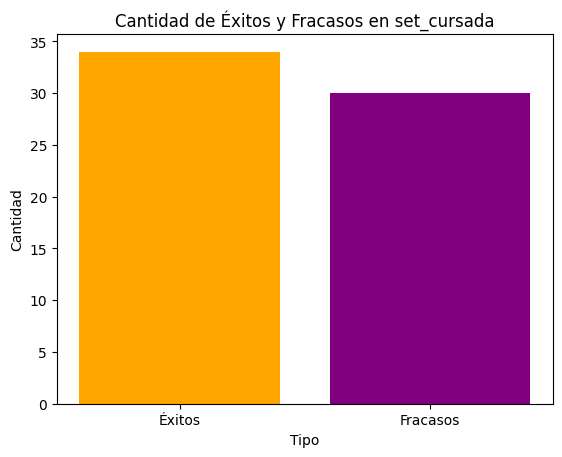

In [ ]:
contador_exito = 0
contador_fracaso = 0

# Itero sobre los elementos de set_data
for cursada in set_cursadas:
    if cursada["exito_global"] == "Éxito":
        contador_exito += 1
    elif cursada["exito_global"] == "Fracaso":
        contador_fracaso += 1

labels = ['Éxitos', 'Fracasos']
cantidad = [contador_exito, contador_fracaso]

# Creo el gráfico de barras
plt.bar(labels, cantidad, color=['orange', 'purple'])

# Agrego etiquetas y título
plt.xlabel('Tipo')
plt.ylabel('Cantidad')
plt.title('Cantidad de Éxitos y Fracasos en set_cursada')

# Muestro el gráfico
plt.show()

## Paso 4.B) Definicion del Algortimo Genetico para generar nuevas cursadas

Los individuos en este caso seran historiales de cursadas, los cuales incluiran las materias cursadas, la informacion del alumno (si trabaja y horas de estudio) y el resultado de la cursada.

### Paso 4.B.1) Represntacion del problema:

Representaremos a los historiales de cursadas como un conjunto de materias la informacion del alumno (si trabaja y horas de estudio) y el resultado de la cursada.

Cada materia posee:

*   Dificultad (valor entre 1 y 10)
*   Horas semanales de clase (valor entero positivo, debido a las caracteristicas del plan todas las materias son de 4 horas semanales)
*   Horas semanales de estudio (valor entero positivo, entre 0 y 168*)
*   Horas semanales de práctica (valor entero positivo, entre 0 y 168*)
*   Año (valor entre 1 a 5. Puede ser T en caso de una materia transversal)

**(*)** Aclaracion: 168 es la cantidad maxima de horas que hay en una semana (24 * 7 = 168 horas)

Problema: Generar historiales de cursadas lo más realistas posibles.

Caracteristicas a representar:

1. Cantidad estimada de horas requeridas por las materias de la cursada.
2. Cantidad de horas semanales de estudio por parte del usuario.
3. Trabaja
4. Resultado del Cuatrimestre (Éxito/Fracaso)

Correpondencia Fenotipo-Genotipo

*  Fenotipo 1: Cantidad estimadas de Horas Necesarias.
*  Genotipo 1: Sumatoria de las horas de clase de cada Materia + Sumatoria de las horas de estudio de cada Materia + Sumatoria de las horas de practica de cada Materia


*  Fenotipo 2: Disponibilidad Horaria del Usuario.
*  Genotipo 2: Valor entero positivo menor a 168


*  Fenotipo 3: ¿Usuario Trabaja?
*  Genotipo 3: {SI (1), NO(0)}


* Fenotipo 4: Resultado  del Cuatrimestre
* Genotipo 4: {Exito (1), Fracaso(0)}

### Paso 4.B.2) Inicializacion de la poblacion

Basandose en el historial de cursadas reales, se crea la poblacion inicial de 200 individuos.

El procedimiento es el siguiente:


1.   Se selecciona una cursada real
2.   Si el resultado fue "Exito", se le saca una materia y se le disminuye la cantidad de horas de estudio del usuario en funcion a la materia eliminada.
3.   Si el resultado fue "Fracaso", se le agrega una materia y se le aumenta la cantidad de horas de estudio del usuario en funcion a la materia agregada.
4.  Cada materia de la cursada tiene una probabilidad del 75% de intercambiarse por otra materia del mismo año.
5.  Hay una probabilidad del 50% de intercambiar el valor de "¿Usuario Trabaja?" al valor opuesto.

Luego de aplicar todas estas modificaciones queda creada un nuevo historial de cursada que se agrega a la poblacion inicial del algoritmo genetico.


In [ ]:
def inicializar_poblacion_cursadas(set_cursadas, mapa_materias):
    poblacion_inicial = []
    exitos_generados = 0
    fracasos_generados = 0
    cursadas = deepcopy(set_cursadas)

    # Agrego todas las cursadas reales a la poblacion inicial
    poblacion_inicial.extend(deepcopy(cursadas))

    while len(poblacion_inicial) < 200:
        # Selecciono aleatoriamente un individuo del cursadas. El deepcopy evita que se modifique el original
        individuo_base = deepcopy(random.choice(cursadas))

        # Determino si el individuo fue un éxito o un fracaso
        resultado = individuo_base["exito_global"]

        # Si el resultado fue éxito, elimina un código de materia aleatorio
        if resultado == "Éxito":
            materias_cursadas = individuo_base["materias_cursadas"].copy()
            if materias_cursadas:
                materia_eliminar = random.choice(materias_cursadas)
                horas_materia_eliminada = mapa_materias[materia_eliminar]["horas_clase"] + mapa_materias[materia_eliminar]["horas_estudio"] +  mapa_materias[materia_eliminar]["horas_practica"]
                materias_cursadas.remove(materia_eliminar)
                individuo_base["materias_cursadas"] = materias_cursadas
                # Actualizo horas de estudio del usuario de esa cursada
                horas_estudio = individuo_base["informacion_personal"]["horas_estudio_semanales"]
                if horas_estudio:
                    individuo_base["informacion_personal"]["horas_estudio_semanales"] = horas_estudio - horas_materia_eliminada

        # Si el resultado fue fracaso, agrega un código de materia aleatorio
        else:
            materias_cursadas = individuo_base["materias_cursadas"].copy()
            codigo_nueva_materia = random.choice(list(mapa_materias.keys()))
            while codigo_nueva_materia in materias_cursadas:  # Validar que no se agregue una materia ya presente
                codigo_nueva_materia = random.choice(list(mapa_materias.keys()))
            individuo_base["materias_cursadas"].append(codigo_nueva_materia)
            horas_materia_agregada = mapa_materias[codigo_nueva_materia]["horas_clase"] + mapa_materias[codigo_nueva_materia]["horas_estudio"] +  mapa_materias[codigo_nueva_materia]["horas_practica"]
            # Actualizo horas de estudio del usuario de esa cursada
            horas_estudio = individuo_base["informacion_personal"]["horas_estudio_semanales"]
            if horas_estudio:
                individuo_base["informacion_personal"]["horas_estudio_semanales"] = horas_estudio + horas_materia_agregada

        # Probabilidad del 75% de intercambiar un código de materia
        materias_cursadas = individuo_base["materias_cursadas"]
        for i in range(len(materias_cursadas)):
            if random.random() < 0.75:
                materia_a_intercambiar = random.choice(materias_cursadas)
                año_materia_a_intercambiar = mapa_materias[materia_a_intercambiar]["año"]

                # Obtengo las materias del mismo año que la materia a intercambiar
                materias_mismo_año = [m for m, info in mapa_materias.items() if info["año"] == año_materia_a_intercambiar]

                # Filtro las materias que no están en las materias cursadas
                materias_disponibles = [m for m in materias_mismo_año if m not in materias_cursadas]

                if materias_disponibles:
                    # Si hay materias disponibles del mismo año, se realiza el intercambio
                    materia_nueva = random.choice(materias_disponibles)
                    materias_cursadas.remove(materia_a_intercambiar)
                    materias_cursadas.append(materia_nueva)
                    individuo_base["materias_cursadas"] = materias_cursadas

        # Probabilidad del 50% de cambiar el valor de 'trabajaba' al opuesto
        if random.random() < 0.5:
            individuo_base["informacion_personal"]["trabajaba"] = not individuo_base["informacion_personal"]["trabajaba"]

        # Agrego el individuo a la población inicial
        poblacion_inicial.append(individuo_base)

        # Actualizo conteo de éxitos y fracasos generados
        if resultado == "Éxito":
            exitos_generados += 1
        else:
            fracasos_generados += 1

        # Verifico si la mitad de la población inicial es de éxitos y la otra mitad de fracasos
        if exitos_generados == 100:
            # Cambio a generar únicamente fracasos
            cursadas = [individuo for individuo in cursadas if individuo["exito_global"] == "Fracaso"]
        elif fracasos_generados == 100:
            # Cambio a generar únicamente éxitos
            cursadas = [individuo for individuo in cursadas if individuo["exito_global"] == "Éxito"]

    return poblacion_inicial

### Paso 4.B.3) Seleccion de los mejores individuos

Funcion para calcular la aptitud de los individuos

Se definió en base a 3 parametros:


1.   Parametro 1: Evalua si el resultado del cuatrimestre es realista
2.   Parametro 2: Evalua si las horas de estudio son realistas en funcion de las horas necesarias y su condicion laboral
3.   Parametro 3: Evalua la cantidad de materias

Estos 3 parametros se encargan de medir el "realismo" de la cursada, en caso que el individuo tenga un parametro realista se aumenta la aptitud. En caso de que algun parametro no sea realista, se reduce la aptitud del individuo en funcion de que tan alejado de la realidad esté.

La funcion de aptitud la definimos de la siguiente manera:

**Aptitud** = Evaluacion del resultado obtenido en el cuatrimestre + Evaluacion de las horas de estudio del usuario + Evaluacion de la cantidad de materias

En caso de que las evaluaciones determinen que el parametro es realista, tendra un valor positivo. En cambio, si luego de la evaluacion se determina que el parametro no es realista, tendra un valor negativo el cual su magnitud dependerá de lo alejado que este de los limites esperados.

In [ ]:
def calcular_aptitud_cursada(individuo, mapa_materias):
    horas_estudio_semanales = individuo["informacion_personal"]["horas_estudio_semanales"]
    trabaja = individuo["informacion_personal"]["trabajaba"]
    materias_cursadas = individuo["materias_cursadas"]
    exito_global = individuo["exito_global"]

    aptitud = 0

    # Parametro 1: Evalua si el resultado del cuatrimestre es realista
    horas_necesarias = sum(map(lambda x: mapa_materias[x]["horas_clase"] + mapa_materias[x]["horas_estudio"] +  mapa_materias[x]["horas_practica"], materias_cursadas))
    margen = 0.1 * horas_necesarias  # Margen del 10%

    if exito_global == "Éxito":
        if horas_estudio_semanales >= horas_necesarias - margen:
            aptitud += 10
        else:
            deficit = (horas_necesarias - horas_estudio_semanales) - margen # Exito pero no alcanzo las horas necesarias
            aptitud -= 10 * (deficit // (0.1 * horas_necesarias))
    elif exito_global == "Fracaso":
        if horas_estudio_semanales <= horas_necesarias + margen:
            aptitud += 10
        else:
            exceso = (horas_estudio_semanales - horas_necesarias) - margen # Fracaso pero excedió las horas necesarias
            aptitud -= 10 * (exceso // (0.1 * horas_necesarias))

    # Parametro 2: Evalua si las horas de estudio son realistas en funcion de las horas necesarias y su condicion laboral
    horas_estudio_necesarias = 0
    for materia in materias_cursadas:
        horas_estudio_necesarias += mapa_materias[materia]["horas_clase"] + mapa_materias[materia]["horas_estudio"] + mapa_materias[materia]["horas_practica"]

    porcentaje_tolerancia = 0.1  # Margen de tolerancia del 10%
    tolerancia = porcentaje_tolerancia * horas_estudio_necesarias

    # Calcula el rango aceptable
    rango_superior = horas_estudio_necesarias + tolerancia
    rango_inferior = horas_estudio_necesarias - tolerancia
    rango_superior_trabaja = rango_superior * 1.05 # Si trabaja, la cursada requerirá un poco mas de esfuerzo y tiempo
    rango_inferior_trabaja = rango_inferior * 1.05 # Si trabaja, la cursada requerirá un poco mas de esfuerzo y tiempo
    horas_minimas = len(materias_cursadas) * 4 # No es realista cursar un cuatrimestre y ni siqueira dedicar el tiempo suficiente para asistir a clase
    horas_maximas = len(materias_cursadas) * 14 # No es realista dedicar mas de 16 horas por dia a la facultad por mas que no trabaje
    horas_maximas_trabaja = len(materias_cursadas) * 12 # No es realista dedicar mas de 12 horas por dia a la facultad si ttrabaja

    # Trabaja y tuvo Exito
    if trabaja and exito_global == "Éxito":
      # Verifica si las horas de estudio semanales están dentro del rango aceptable
      if rango_inferior_trabaja <= horas_estudio_semanales <= horas_maximas_trabaja:
        aptitud += 10
      else:
        if rango_inferior_trabaja > horas_estudio_semanales:
          aptitud -= 2 * (abs(rango_inferior_trabaja - horas_estudio_semanales))
        else:
          aptitud -= 2 * (abs(horas_maximas_trabaja - horas_estudio_semanales))

    # Trabaja y Fracaso
    if trabaja and exito_global == "Fracaso":
      # Verifica si las horas de estudio semanales están dentro del rango aceptable
      if horas_minimas <= horas_estudio_semanales <= rango_superior_trabaja:
        aptitud += 10
      else:
        if horas_minimas > horas_estudio_semanales:
          aptitud -= 2 * (abs(horas_minimas - horas_estudio_semanales))
        else:
          aptitud -= 2 * (abs(rango_superior_trabaja - horas_estudio_semanales))

    # No Trabaja y tuvo Exito
    if not trabaja and exito_global == "Éxito":
      # Verifica si las horas de estudio semanales están dentro del rango aceptable
      if rango_inferior <= horas_estudio_semanales <= horas_maximas:
        aptitud += 10
      else:
        if rango_inferior > horas_estudio_semanales:
          aptitud -= 2 * (abs(rango_inferior - horas_estudio_semanales))
        else:
          aptitud -= 2 * (abs(horas_maximas - horas_estudio_semanales))

    # No Trabaja y Fracaso
    if not trabaja and exito_global == "Fracaso":
      # Verifica si las horas de estudio semanales están dentro del rango aceptable
      if horas_minimas <= horas_estudio_semanales <= rango_superior:
        aptitud += 10
      else:
        if horas_minimas > horas_estudio_semanales:
          aptitud -= 2 * (abs(horas_minimas - horas_estudio_semanales))
        else:
          aptitud -= 2 * (abs(rango_superior - horas_estudio_semanales))

    # Parametro 3: Evalua la cantidad de materias
    cantidad_materias = len(materias_cursadas)
    if 3 <= cantidad_materias <= 6:
        aptitud += 10
    else:
        if cantidad_materias < 3:
            aptitud -= 5 * (3 - cantidad_materias) ** 2  # Penalizacion por menos de 3 materias
        else:
            aptitud -= 5 * (cantidad_materias - 6) ** 2  # Penalizacion por más de 6 materias

    return aptitud

Funcion para realizar la selección por torneo

Elegimos utilizar una seleccion por torneo para mantener un buen nivel de diversidad entre las generaciones.

Elegimos una seleccion por torneo en la cual se elijan 2 individuos al azar y se seleccione al de mayor aptitud. En esta etapa seleccionamos al 50% de la poblacion actual para pasar a la siguiente generación.

In [ ]:
def seleccion_por_torneo_cursada(poblacion, mapa_materias, num_seleccionados):
    # Copio la población para trabajar con ella
    poblacion_copia = deepcopy(poblacion)

    seleccionados = []
    while len(seleccionados) < num_seleccionados:
        # Selecciono dos individuos aleatorios de la copia de la población
        individuo1 = random.choice(poblacion_copia)
        poblacion_copia.remove(individuo1)  # Elimino el individuo seleccionado para no repetirlo en otro torneo
        individuo2 = random.choice(poblacion_copia)
        poblacion_copia.remove(individuo2)  # Elimino el individuo seleccionado para no repetirlo en otro torneo

        # Calculo la aptitud de cada individuo
        aptitud_individuo1 = calcular_aptitud_cursada(individuo1, mapa_materias)
        aptitud_individuo2 = calcular_aptitud_cursada(individuo2, mapa_materias)

        # Elijo al individuo más apto como ganador del torneo
        if aptitud_individuo1 > aptitud_individuo2:
            seleccionados.append(individuo1)
        else:
            seleccionados.append(individuo2)

    # Ordeno los seleccionados por aptitud de mayor a menor
    seleccionados.sort(key=lambda x: calcular_aptitud_cursada(x, mapa_materias), reverse=True)

    # Devuelvo los mejores individuos
    return seleccionados[:num_seleccionados]

### Paso 4.B.4) Cruza de individuos

Decidimos utilizar una cruza simple. En este caso decidimos elegir el metodo clasico de la cruza para simplificar la complejidad del problema.

Funciona de la siguiente manera:

Cruza Progenitor A x Progenitor B = Hijo A
Donde Hijo A tiene las materias del Padre A, y la informacion del alumno y resultado del cuatrimestre del padre B.

Cruza Progenitor A x Progenitor B = Hijo B
Donde Hijo B tiene las materias del Padre B, y la informacion del alumno y resultado del cuatrimestre del padre A.

In [ ]:
def cruzar_cursada(padre_a, padre_b):
    # Obtengo las materias del padre A
    materias_padre_a = padre_a["materias_cursadas"]
    # Obtengo la información personal y el resultado del padre B
    info_personal_padre_b = padre_b["informacion_personal"]
    resultado_padre_b = padre_b["exito_global"]

    # Obtengo las materias del padre B
    materias_padre_b = padre_b["materias_cursadas"]
    # Obtengo la información personal y el resultado del padre A
    info_personal_padre_a = padre_a["informacion_personal"]
    resultado_padre_a = padre_a["exito_global"]

    # Creo los hijos intercambiando las materias y la información personal de los padres
    hijo_a = {
        "materias_cursadas": materias_padre_a,
        "informacion_personal": info_personal_padre_b.copy(),
        "exito_global": resultado_padre_b
    }
    hijo_b = {
        "materias_cursadas": materias_padre_b,
        "informacion_personal": info_personal_padre_a.copy(),
        "exito_global": resultado_padre_a
    }

    return hijo_a, hijo_b

### Paso 4.B.5) Mutacion de individuos

Decidimos generar distintos tipos de mutaciones para aumentar la diversidad de la poblacion.

Los tipos de mutaciones posibles son los siguientes:

* Invertir el resultado del cuatrimestre (Probabilidad 10%)
* Invertir el valor del gen "Trabaja" (Probabilidad: 10%)
* Aumentar un 20% las horas de estudio del alumno (Probabilidad: 10%)
* Disminuir un 20% las horas de estudio del alumno (Probabilidad: 10%)
* Intercambiar una materia de la cursada por otra del mismo año (Probabilidad: 10%)

Cada una de estas mutaciones tienen un 10% de probabilidades de ocurrir. Nuestro objetivo es aumentar la diversidad de la poblacion lo mayor posible, de forma tal que cuando se usen estos datos para entrenar la red neuronal, se tengan en cuenta los distintos escenarios y alternativas que pueden ocurrir en una cursada.

In [ ]:
def mutar_cursada(individuo):
    # Probabilidad del 10% de cambiar de Éxito a Fracaso o viceversa
    if random.random() <= 0.1:
        if individuo["exito_global"] == "Éxito":
            individuo["exito_global"] = "Fracaso"
        else:
            individuo["exito_global"] = "Éxito"

    # Probabilidad del 10% de cambiar el valor de 'trabajaba'
    if random.random() <= 0.1:
        individuo["informacion_personal"]["trabajaba"] = not individuo["informacion_personal"]["trabajaba"]

    # Probabilidad del 10% de modificar +20% las horas de estudio semanales
    if random.random() <= 0.1:
        individuo["informacion_personal"]["horas_estudio_semanales"] *= 1.25

    # Probabilidad del 10% de modificar -20% las horas de estudio semanales
    if random.random() <= 0.1:
        individuo["informacion_personal"]["horas_estudio_semanales"] *= 0.8

    # Probabilidad del 10% de modificar una cada una de las materias
    materias_cursadas = individuo["materias_cursadas"]
    for i in range(len(materias_cursadas)):
        if random.random() <= 0.1:
            materia_a_intercambiar = random.choice(materias_cursadas)
            año_materia_a_intercambiar = mapa_materias[materia_a_intercambiar]["año"]

            # Obtengo las materias del mismo año que la materia a intercambiar
            materias_mismo_año = [m for m, info in mapa_materias.items() if info["año"] == año_materia_a_intercambiar]

            # Filtro las materias que no están en las materias cursadas
            materias_disponibles = [m for m in materias_mismo_año if m not in materias_cursadas]

            if materias_disponibles:
                # Si hay materias disponibles del mismo año, se realiza el intercambio
                materia_nueva = random.choice(materias_disponibles)
                materias_cursadas.remove(materia_a_intercambiar)
                materias_cursadas.append(materia_nueva)
                individuo["materias_cursadas"] = materias_cursadas

    return individuo

### Paso 4.B.6) Puesta en Marcha del Algoritmo Genetico

In [ ]:
def ejecutar_algoritmo_genetico_cursada(set_cursadas, mapa_materias, num_iteraciones, num_generaciones_sin_mejora):
    # Inicializo población
    poblacion_actual = inicializar_poblacion_cursadas(set_cursadas, mapa_materias)

    # Variables para controlar la convergencia
    mejor_aptitud_poblacion = float('-inf')
    generaciones_sin_mejora = 0

    # Itero sobre el número máximo de iteraciones o hasta que no haya mejora en cierto número de generaciones
    for iteracion in range(num_iteraciones):
        # Calculo aptitud de la población actual
        aptitud_actual = 0
        for individuo in poblacion_actual:
            aptitud_actual += calcular_aptitud_cursada(individuo, mapa_materias)

        # Verifico si ha habido mejora en la aptitud de la poblacion
        if aptitud_actual > mejor_aptitud_poblacion:
            mejor_aptitud_poblacion = aptitud_actual
            generaciones_sin_mejora = 0
        else:
            generaciones_sin_mejora += 1

        # Verifico si se detiene el algoritmo por falta de mejora
        if generaciones_sin_mejora >= num_generaciones_sin_mejora:
            break

        # Selecciono los mejores individuos para la próxima generación, me quedo con la mitad de la poblacion
        poblacion_seleccionada = seleccion_por_torneo_cursada(poblacion_actual, mapa_materias, num_seleccionados=len(poblacion_actual) // 2)

        # Cruzo los individuos seleccionados para generar los hijos que completaran la mitad faltante de la poblacion
        poblacion_hijos = []
        for i in range(0, len(poblacion_seleccionada), 2):
            hijo_a, hijo_b = cruzar_cursada(poblacion_seleccionada[i], poblacion_seleccionada[i + 1])
            poblacion_hijos.extend([hijo_a, hijo_b])

        # Aplico mutación a todos
        poblacion_mutada = [mutar_cursada(individuo) for individuo in poblacion_hijos] + [mutar_cursada(individuo) for individuo in poblacion_seleccionada]

        #Selecciono los mejores luego de cruzar y mutar, me quedo con la mitad de la poblacion mutada
        poblacion_seleccionada2 = seleccion_por_torneo_cursada(poblacion_mutada, mapa_materias, num_seleccionados=len(poblacion_mutada) // 2)

        # Pasan a la siguiente generacion los mejores individuos de la población actual y de la población mutada
        poblacion_actual = poblacion_seleccionada + poblacion_seleccionada2

    return poblacion_actual

### Ejemplo de la poblacion final luego de ejecutar el AG

In [ ]:
#poblacion = inicializar_poblacion_cursadas(set_cursadas, mapa_materias)
poblacion = ejecutar_algoritmo_genetico_cursada(set_cursadas, mapa_materias, 30, 10)
# Imprimo cada individuo en un renglón
for individuo in poblacion:
    print(individuo)

{'materias_cursadas': ['3621', '3623', '3627', '3628', '903'], 'informacion_personal': {'trabajaba': True, 'horas_estudio_semanales': 39.0625}, 'exito_global': 'Fracaso'}
{'materias_cursadas': ['3643', '3641', '3644', '3634'], 'informacion_personal': {'trabajaba': True, 'horas_estudio_semanales': 38.400000000000006}, 'exito_global': 'Éxito'}
{'materias_cursadas': ['3623', '3635', '3653', '3636', '3649', '3659'], 'informacion_personal': {'trabajaba': True, 'horas_estudio_semanales': 24.320000000000007}, 'exito_global': 'Fracaso'}
{'materias_cursadas': ['3634', '3676', '3642', '3636'], 'informacion_personal': {'trabajaba': True, 'horas_estudio_semanales': 25.6}, 'exito_global': 'Fracaso'}
{'materias_cursadas': ['3641', '3624', '3638'], 'informacion_personal': {'trabajaba': True, 'horas_estudio_semanales': 14.336000000000002}, 'exito_global': 'Fracaso'}
{'materias_cursadas': ['3642', '3635', '3653', '3633', '3652'], 'informacion_personal': {'trabajaba': True, 'horas_estudio_semanales': 33

## Paso 4.C) Armo el dataset de cursadas

In [ ]:
set_data = []
contador_exito = 0
contador_fracaso = 0

while len(set_data) < 100000:
    poblacion = ejecutar_algoritmo_genetico_cursada(set_cursadas, mapa_materias, 20, 5)
    poblacion_seleccionada = sorted(poblacion, key=lambda x: calcular_aptitud_cursada(x, mapa_materias), reverse=True)[:50]

    for ind in poblacion_seleccionada:
        if contador_exito < 50000 and ind["exito_global"] == "Éxito":
            set_data.append(ind)
            contador_exito += 1
        elif contador_fracaso < 50000 and ind["exito_global"] == "Fracaso":
            set_data.append(ind)
            contador_fracaso += 1

# PARTE 5: Creacion de la Red Neuronal

Decidimos utilizar una red neuronal TensorFlow/Keras

## Paso 5.A) Analisis de los datos Generados

Cantidad de Exitos y de Fracasos

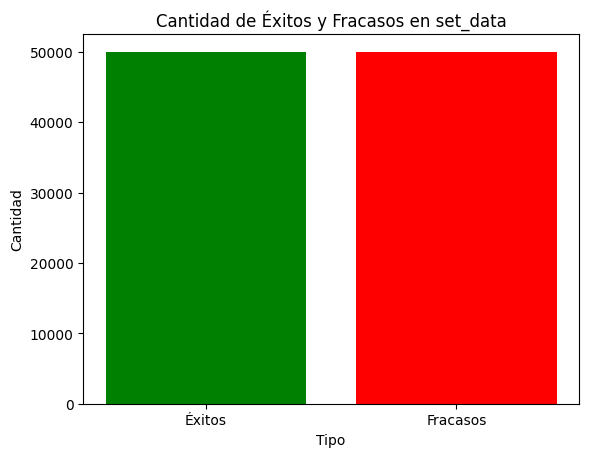

In [ ]:
contador_exito = 0
contador_fracaso = 0

# Itero sobre los elementos de set_data
for individuo in set_data:
    if individuo["exito_global"] == "Éxito":
        contador_exito += 1
    elif individuo["exito_global"] == "Fracaso":
        contador_fracaso += 1

labels = ['Éxitos', 'Fracasos']
cantidad = [contador_exito, contador_fracaso]

# Creo el gráfico de barras
plt.bar(labels, cantidad, color=['green', 'red'])

# Agrego etiquetas y título
plt.xlabel('Tipo')
plt.ylabel('Cantidad')
plt.title('Cantidad de Éxitos y Fracasos en set_data')

# Muestro el gráfico
plt.show()

Ejemplos de instancias creadas:

In [ ]:
# Filtro los primeros 5 individuos de éxito
exitos = [individuo for individuo in set_data if individuo["exito_global"] == "Éxito"][:20]

# Filtro los primeros 5 individuos de fracaso
fracasos = [individuo for individuo in set_data if individuo["exito_global"] == "Fracaso"][:20]

# Muestro los individuos de éxito
print("Primeros 5 individuos de éxito:")
for i, individuo in enumerate(exitos, 1):
    print(f"Individuo {i}: {individuo}")

# Muestro los individuos de fracaso
print("\nPrimeros 5 individuos de fracaso:")
for i, individuo in enumerate(fracasos, 1):
    print(f"Individuo {i}: {individuo}")

Primeros 5 individuos de éxito:
Individuo 1: {'materias_cursadas': ['3631', '3632', '3621', '3629'], 'informacion_personal': {'trabajaba': False, 'horas_estudio_semanales': 30.400000000000002}, 'exito_global': 'Éxito'}
Individuo 2: {'materias_cursadas': ['3664', '3629', '3661', '3645'], 'informacion_personal': {'trabajaba': False, 'horas_estudio_semanales': 42}, 'exito_global': 'Éxito'}
Individuo 3: {'materias_cursadas': ['3638', '3680', '901', '3662', '3675'], 'informacion_personal': {'trabajaba': True, 'horas_estudio_semanales': 47.5}, 'exito_global': 'Éxito'}
Individuo 4: {'materias_cursadas': ['3638', '3680', '901', '3662', '3675'], 'informacion_personal': {'trabajaba': True, 'horas_estudio_semanales': 47.5}, 'exito_global': 'Éxito'}
Individuo 5: {'materias_cursadas': ['3631', '902', '3639', '3643', '3676'], 'informacion_personal': {'trabajaba': False, 'horas_estudio_semanales': 42}, 'exito_global': 'Éxito'}
Individuo 6: {'materias_cursadas': ['3631', '3624', '3623', '3626', '3621'

Distribucion de cantidad de Materias en las Cursadas

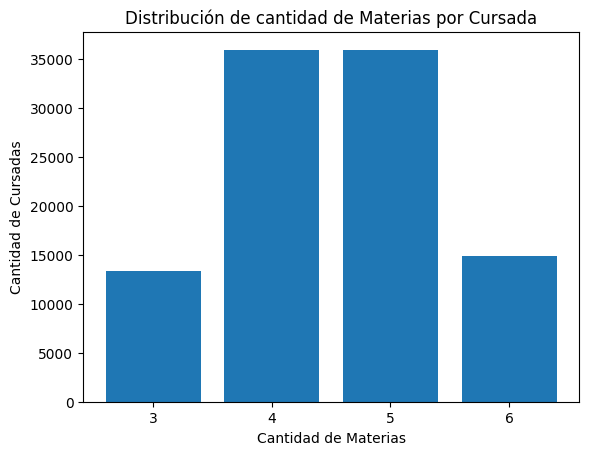

In [ ]:
# Cuento la cantidad de materias por cursada
materias_por_cursada = [len(individuo['materias_cursadas']) for individuo in set_data]
conteo_materias = Counter(materias_por_cursada)

# Creo el gráfico de barras
plt.bar(conteo_materias.keys(), conteo_materias.values())

# Configuro los ticks del eje X para que sean enteros
plt.xticks(range(min(conteo_materias.keys()), max(conteo_materias.keys()) + 1))

# Agrego etiquetas y título
plt.xlabel('Cantidad de Materias')
plt.ylabel('Cantidad de Cursadas')
plt.title('Distribución de cantidad de Materias por Cursada')

# Muestro el gráfico
plt.show()

Porcentaje de cursadas que el alumno trabajaba/no trabajaba

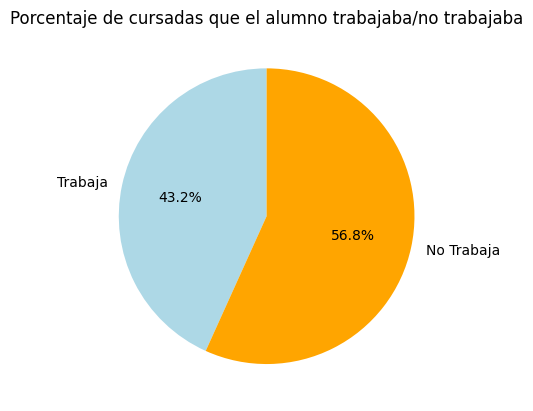

In [ ]:
# Cuento la cantidad de trabaja True/False
trabaja_valores = [individuo['informacion_personal']['trabajaba'] for individuo in set_data]
conteo_trabaja = Counter(trabaja_valores)

# Creo el gráfico de pastel
labels = ['Trabaja', 'No Trabaja']
sizes = [conteo_trabaja[True], conteo_trabaja[False]]
colors = ['lightblue', 'orange']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

# Agrego título
plt.title('Porcentaje de cursadas que el alumno trabajaba/no trabajaba')

# Muestro el gráfico
plt.show()

Distribucuion de cursadas exitosas cuando el alumno trabajaba

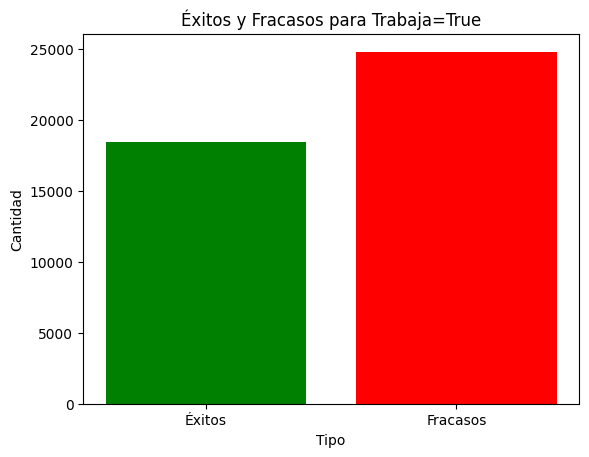

In [ ]:
# Filtro datos para trabaja=True
trabaja_true = [individuo for individuo in set_data if individuo['informacion_personal']['trabajaba']]

# Cuento éxitos y fracasos
contador_exito = sum(1 for individuo in trabaja_true if individuo['exito_global'] == 'Éxito')
contador_fracaso = sum(1 for individuo in trabaja_true if individuo['exito_global'] == 'Fracaso')

# Creo el gráfico de barras
labels = ['Éxitos', 'Fracasos']
cantidad = [contador_exito, contador_fracaso]

plt.bar(labels, cantidad, color=['green', 'red'])

# Agrego etiquetas y título
plt.xlabel('Tipo')
plt.ylabel('Cantidad')
plt.title('Éxitos y Fracasos para Trabaja=True')

# Muestro el gráfico
plt.show()

Distribucuion de cursadas exitosas cuando el alumno trabajaba

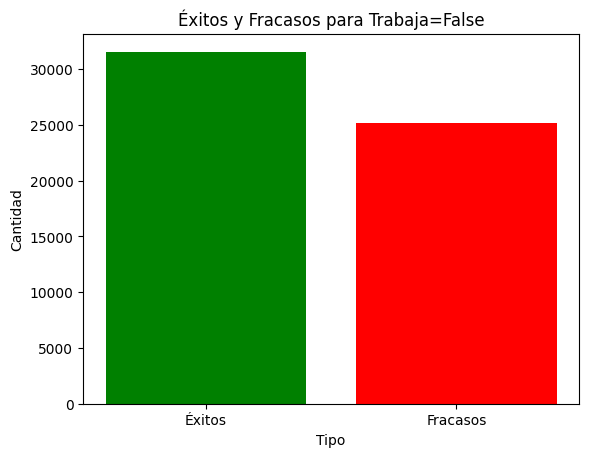

In [ ]:
# Fitlro datos para trabaja=False
trabaja_false = [individuo for individuo in set_data if not individuo['informacion_personal']['trabajaba']]

# Cuento éxitos y fracasos
contador_exito = sum(1 for individuo in trabaja_false if individuo['exito_global'] == 'Éxito')
contador_fracaso = sum(1 for individuo in trabaja_false if individuo['exito_global'] == 'Fracaso')

# Creo el gráfico de barras
labels = ['Éxitos', 'Fracasos']
cantidad = [contador_exito, contador_fracaso]

plt.bar(labels, cantidad, color=['green', 'red'])

# Agrego etiquetas y título
plt.xlabel('Tipo')
plt.ylabel('Cantidad')
plt.title('Éxitos y Fracasos para Trabaja=False')

# Muestro el gráfico
plt.show()


## Paso 5.B) Definicion de la Red Neuronal

In [ ]:
#Definimos el numero maximo de materias que podemos llegar a encontrar en una cursada promedio
MATERIAS = 6 #Considerando una materia por dia de lunes a sabado.

#Generamos los nombres de las columnas del dataframe
#Por cada materia: Mx = numero de materia, Dx = dificultad de la materia
columnas = []
for n in range(MATERIAS):
  columnas.append("M"+str(n+1))
  columnas.append("D"+str(n+1))
  columnas.append("HC"+str(n+1))
  columnas.append("HE"+str(n+1))
  columnas.append("HP"+str(n+1))

#Agregamos columnas para los parametros que faltan
for n in ("Trabaja","Horas_Estudio_Semanales","Exito_Global"):
  columnas.append(n)

#Procesamos los 10000 valores generados anteriormente siguiendo el formato especificado
datos = []
TAM = len(columnas)
for individuo in set_data:
  entrada = [0 for n in range(TAM)] #inicializar con 0
  idx = 0
  for mat in individuo["materias_cursadas"]:
    entrada[idx] = int(mat)
    entrada[idx+1] = mapa_materias[mat]["dificultad"]
    entrada[idx+2] = mapa_materias[mat]["horas_clase"]
    entrada[idx+3] = mapa_materias[mat]["horas_estudio"]
    entrada[idx+4] = mapa_materias[mat]["horas_practica"]
    idx+=5
  entrada[TAM-3] = int(individuo["informacion_personal"]["trabajaba"])
  entrada[TAM-2] = individuo["informacion_personal"]["horas_estudio_semanales"]
  entrada[TAM-1] = 0 if individuo["exito_global"] == "Fracaso" else 1
  datos.append(entrada)

#Mostramos los primeros 5 elementos
print(columnas)
for n in range(5):
  print(datos[n])

['M1', 'D1', 'HC1', 'HE1', 'HP1', 'M2', 'D2', 'HC2', 'HE2', 'HP2', 'M3', 'D3', 'HC3', 'HE3', 'HP3', 'M4', 'D4', 'HC4', 'HE4', 'HP4', 'M5', 'D5', 'HC5', 'HE5', 'HP5', 'M6', 'D6', 'HC6', 'HE6', 'HP6', 'Trabaja', 'Horas_Estudio_Semanales', 'Exito_Global']
[3645, 6, 4, 2, 3, 3647, 4, 4, 1, 4, 3661, 5, 4, 2, 4, 3653, 6, 4, 3, 3, 3641, 7, 4, 3, 4, 3667, 6, 4, 2, 3, 0, 24.320000000000004, 0]
[3658, 8, 4, 3, 4, 3665, 6, 4, 2, 3, 3660, 8, 4, 3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 19.200000000000003, 0]
[3664, 6, 4, 4, 1, 3649, 9, 4, 4, 3, 3638, 6, 4, 3, 3, 911, 2, 4, 1, 3, 3635, 9, 4, 2, 4, 0, 0, 0, 0, 0, 0, 30.400000000000002, 0]
[3645, 6, 4, 2, 3, 3649, 9, 4, 4, 3, 3636, 7, 4, 2, 4, 3652, 8, 4, 2, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 21.760000000000005, 0]
[3655, 4, 4, 3, 1, 3622, 9, 4, 3, 4, 902, 3, 4, 2, 2, 3623, 5, 4, 1, 4, 3656, 7, 4, 3, 3, 0, 0, 0, 0, 0, 0, 47.0, 0]


## Paso 5.C) Creación del dataset

Nos basamos en el siguiente modelo de la documentación:

https://www.tensorflow.org/tutorials/structured_data/preprocessing_layers

Video de la catedra explicando tensorflow/keras

https://drive.google.com/file/d/1yxoH17T9cyEaLXkccYVtCTmgKhpDDhxa/view

In [ ]:
#Creamos el dataframe con los datos preprocesados
df = pd.DataFrame(data=datos,columns=columnas)
#Mostramos las primeras entradas del dataframe
df.head()

,M1,D1,HC1,HE1,HP1,M2,D2,HC2,HE2,HP2,...,HE5,HP5,M6,D6,HC6,HE6,HP6,Trabaja,Horas_Estudio_Semanales,Exito_Global
0,3645,6,4,2,3,3647,4,4,1,4,...,3,4,3667,6,4,2,3,0,24.32,0
1,3658,8,4,3,4,3665,6,4,2,3,...,0,0,0,0,0,0,0,0,19.20,0
2,3664,6,4,4,1,3649,9,4,4,3,...,2,4,0,0,0,0,0,0,30.40,0
3,3645,6,4,2,3,3649,9,4,4,3,...,0,0,0,0,0,0,0,1,21.76,0
4,3655,4,4,3,1,3622,9,4,3,4,...,3,3,0,0,0,0,0,0,47.00,0


In [ ]:
#Dividimos el dataframe en entrenamiento, validacion y pruebas (80,10,10)%
train, validation, test = np.split(df.sample(frac=1), [int(0.8*len(df)), int(0.9*len(df))])
print(len(train), 'entradas en Train')
print(len(validation), 'entradas en Validation')
print(len(test), 'entradas en Test')

80000 entradas en Train
10000 entradas en Validation
10000 entradas en Test


In [ ]:
#Funcion que convierte dataframes a datasets
def df_to_dataset(dataframe, shuffle=True, batch_size=32):
  df = dataframe.copy()
  labels = df.pop('Exito_Global') #Exito_Global es la variable objetivo de nuestra red
  df = {key: value.values[:,tf.newaxis] for key, value in dataframe.items()}
  ds = tf.data.Dataset.from_tensor_slices((dict(df), labels))
  if shuffle:
    ds = ds.shuffle(buffer_size=len(dataframe))
  ds = ds.batch(batch_size)
  ds = ds.prefetch(batch_size)
  return ds

In [ ]:
#Creamos los datasets
batch_size = 256 #80000(train)/256 = 313 iteraciones
train_ds = df_to_dataset(train, batch_size=batch_size)
val_ds = df_to_dataset(validation, shuffle=False, batch_size=batch_size)
test_ds = df_to_dataset(test, shuffle=False, batch_size=batch_size)

## Paso 5.D) Definicion del modelo

In [ ]:
#Funcion para normalizar datos numericos
def get_normalization_layer(name, dataset):
  # Create a Normalization layer for the feature.
  normalizer = layers.Normalization(axis=None)

  # Prepare a Dataset that only yields the feature.
  feature_ds = dataset.map(lambda x, y: x[name])

  # Learn the statistics of the data.
  normalizer.adapt(feature_ds)

  return normalizer

In [ ]:
#Por cada parametro, agregamos una capa de Input, seguida de una capa de normalizacion.
#Al finalizar utilizamos la capa de concatenacion para unirlos en un unico tensor que sera la entrada de las siguientes capas

all_inputs = []
encoded_features = []

for header in columnas[:-1]:
  numeric_col = tf.keras.Input(shape=(1,), name=header)
  normalization_layer = get_normalization_layer(header, train_ds)
  encoded_numeric_col = normalization_layer(numeric_col)
  all_inputs.append(numeric_col)
  encoded_features.append(encoded_numeric_col)

Documentacion: https://keras.io/api/layers/

In [ ]:
all_features = tf.keras.layers.concatenate(encoded_features)
x = tf.keras.layers.Dense(32, activation="relu")(all_features)
x = tf.keras.layers.Dropout(0.5)(x)#ayuda a prevenir overfitting
output = tf.keras.layers.Dense(1)(x)

model = tf.keras.Model(all_inputs, output)

Documentacion:

https://keras.io/api/optimizers/


https://keras.io/api/losses/

In [ ]:
#Compilamos el modelo
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=["accuracy"])

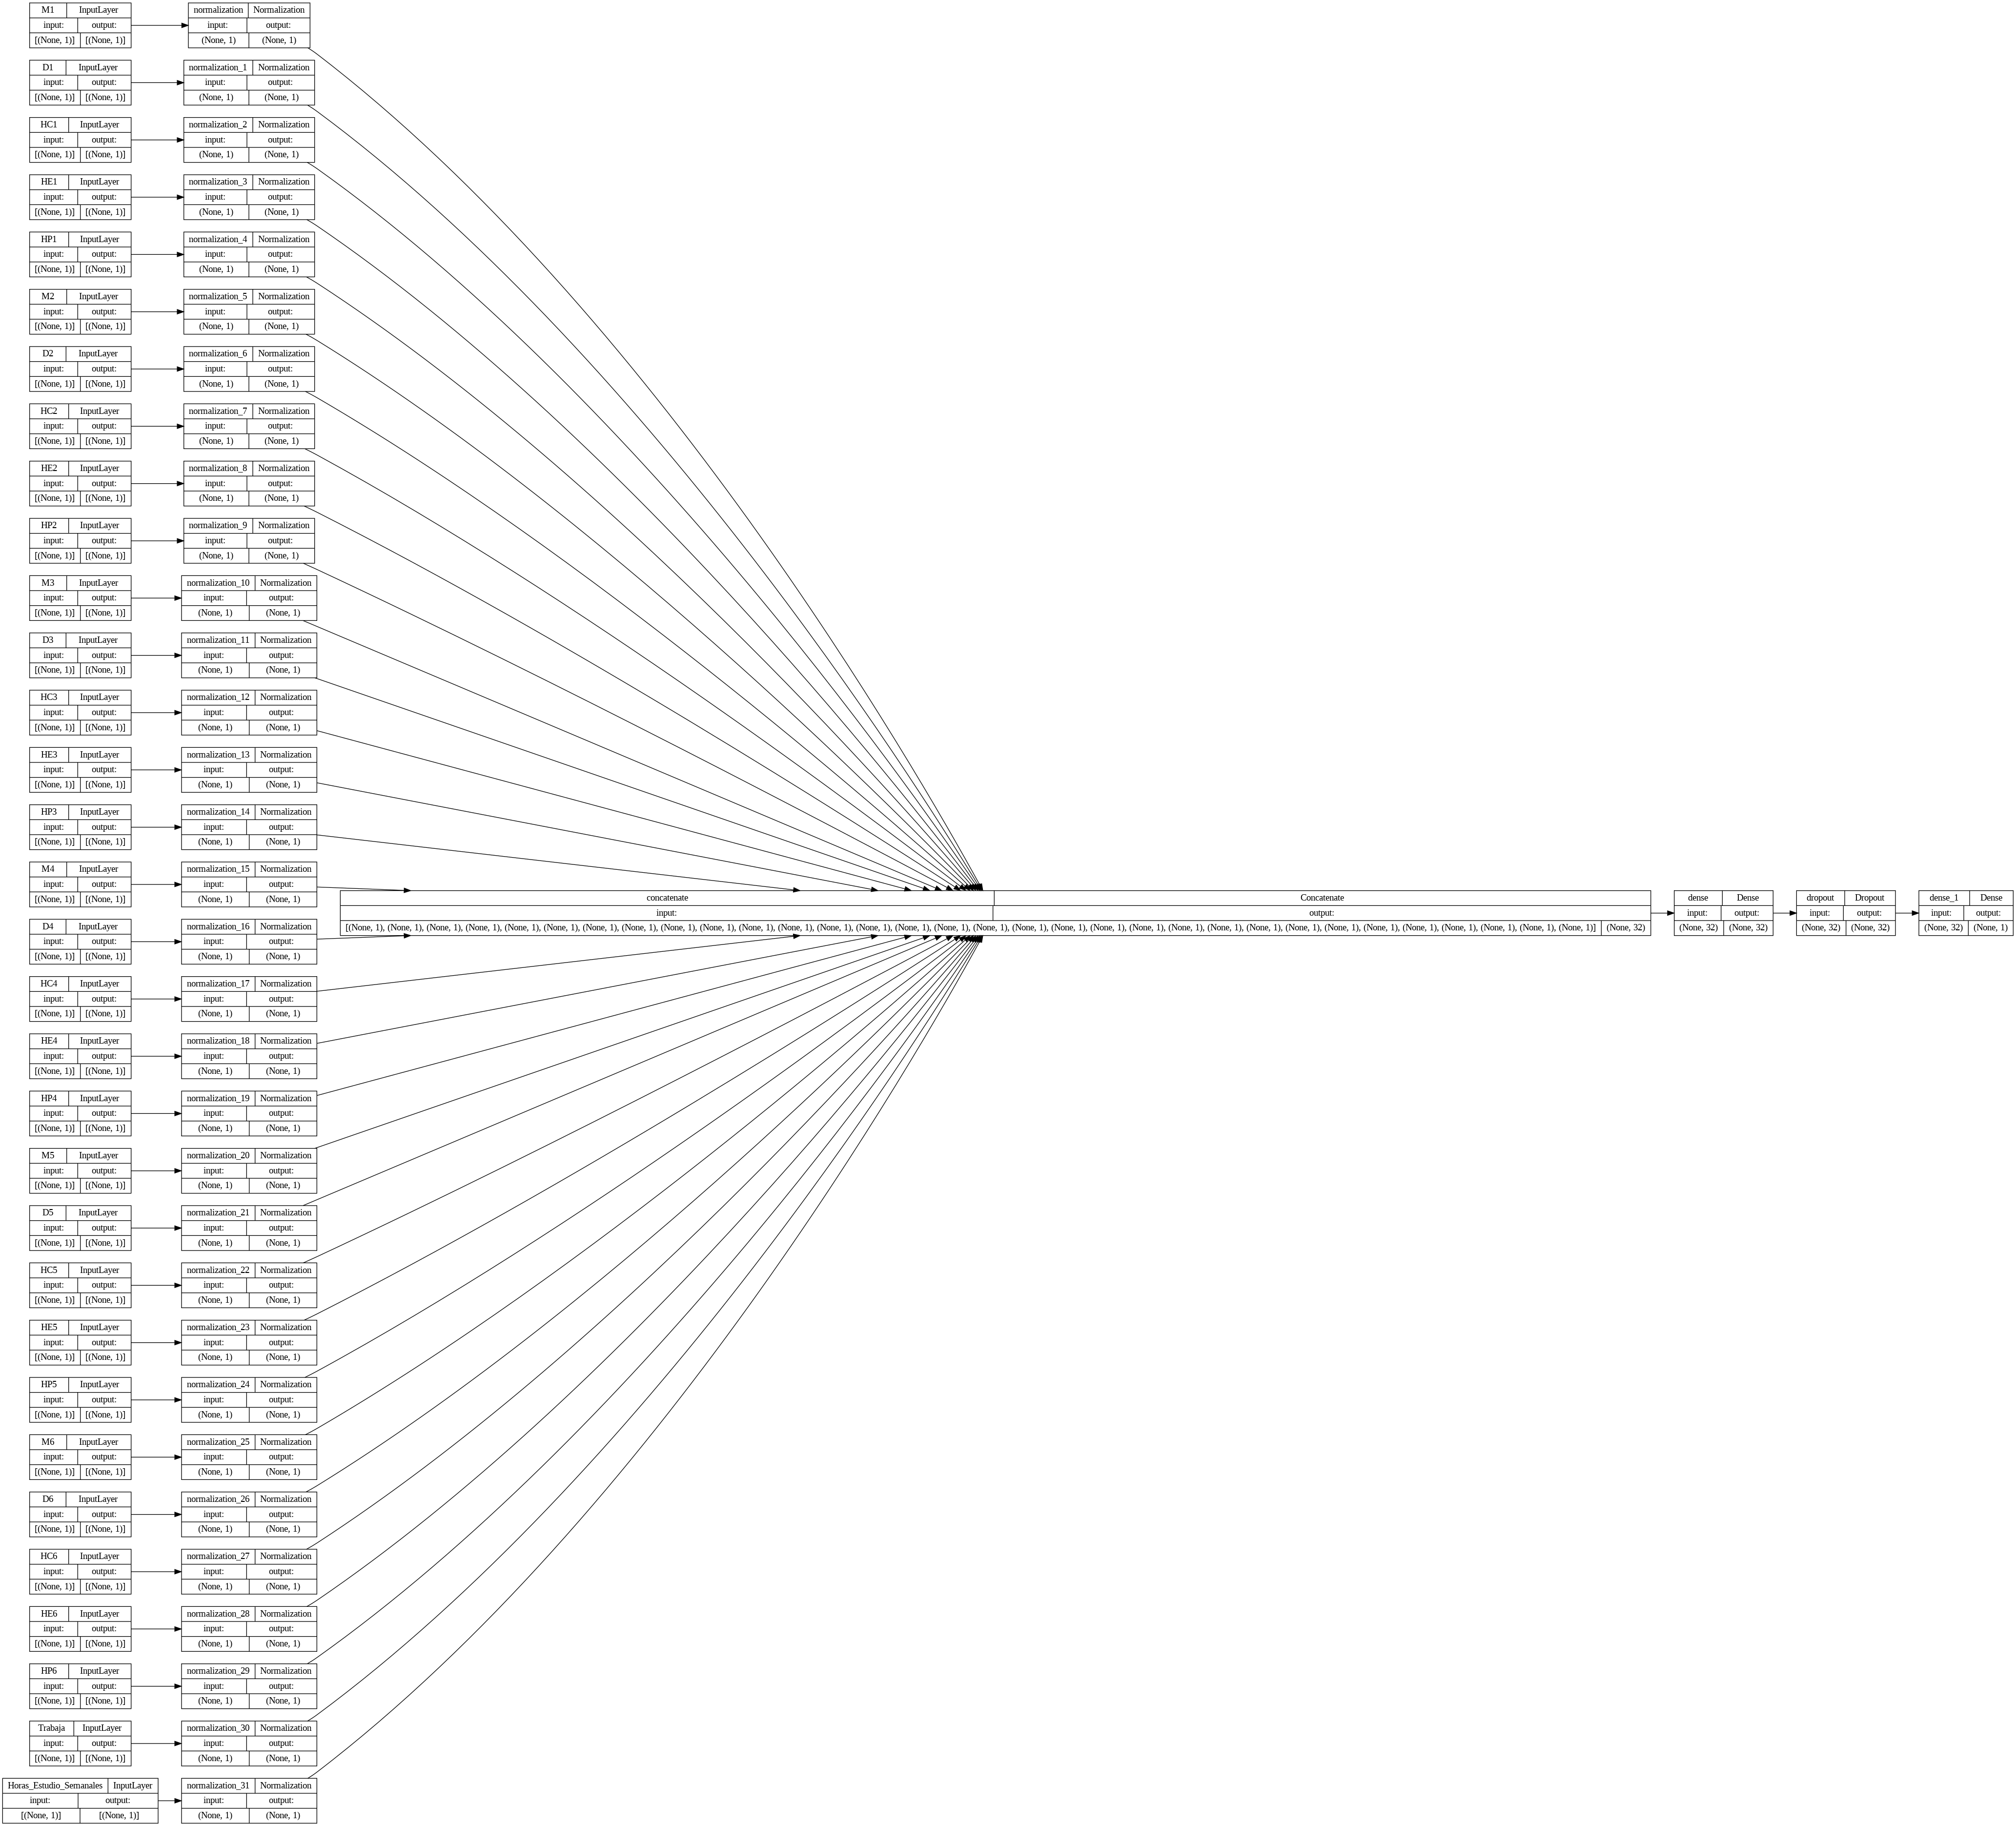

In [ ]:
#Visualización del modelo que definimos
tf.keras.utils.plot_model(model, show_shapes=True, rankdir="LR")

## Paso 5.E) Entrenamiento del modelo

In [ ]:
# Definimos el callback EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_accuracy',     # monitoreamos la precisión en el conjunto de validación
    patience=15,                 # número de epochs con no mejora antes de detener
    restore_best_weights=True   # restaura los mejores pesos al finalizar
)

#Entrenamos con 50 Epochs de 313 iteraciones c/u (Batches de 256)
model.fit(train_ds, epochs=50, validation_data=val_ds, callbacks=[early_stopping])

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/engine/functional.py:642: UserWarning: Input dict contained keys ['Exito_Global'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


313/313 [==============================] - 7s 12ms/step - loss: 0.5430 - accuracy: 0.6947 - val_loss: 0.3386 - val_accuracy: 0.8463
Epoch 2/50
313/313 [==============================] - 5s 11ms/step - loss: 0.3225 - accuracy: 0.8387 - val_loss: 0.2507 - val_accuracy: 0.8688
Epoch 3/50
313/313 [==============================] - 6s 14ms/step - loss: 0.2745 - accuracy: 0.8602 - val_loss: 0.2379 - val_accuracy: 0.8738
Epoch 4/50
313/313 [==============================] - 7s 16ms/step - loss: 0.2621 - accuracy: 0.8654 - val_loss: 0.2357 - val_accuracy: 0.8762
Epoch 5/50
313/313 [==============================] - 6s 16ms/step - loss: 0.2541 - accuracy: 0.8702 - val_loss: 0.2320 - val_accuracy: 0.8799
Epoch 6/50
313/313 [==============================] - 4s 10ms/step - loss: 0.2476 - accuracy: 0.8729 - val_loss: 0.2273 - val_accuracy: 0.8811
Epoch 7/50
313/313 [==============================] - 4s 9ms/step - loss: 0.2421 - accuracy: 0.8759 - val_loss: 0.2248 - val_accuracy: 0.8818
Epoch 8/50


## Paso 5.F) Evaluacion

In [ ]:
#Evaluamos Accuracy
accuracy = model.evaluate(test_ds)[1]
print("Accuracy", accuracy)

40/40 [==============================] - 0s 11ms/step - loss: 0.2052 - accuracy: 0.9003
Accuracy 0.9003000259399414


In [ ]:
#Evaluacion Loss
loss = model.evaluate(test_ds)[0]
print("Loss", loss)

40/40 [==============================] - 0s 10ms/step - loss: 0.2052 - accuracy: 0.9003
Loss 0.2052234560251236


## Paso 5.G) Guardamos el modelo

In [ ]:
#Guardamos el modelo en un archivo para poder reutilizarlo para evaluar casos sin necesidad de reentrenar.
model.save('materias.keras')
#Cargamos el modelo ya entrenado desde el archivo creado anteriormente.
modelo = tf.keras.models.load_model('materias.keras')

## Paso 5.H) Predicción

Esta seccion seria un prototipo hardcodeado de lo que luego se tranformacion en el caso de uso "Calcular probabilidad de Éxito de una Cursada".

Si desea evaluar la probabilidad de Exito de una cursada, agregue dentro de la lista de materias los codigos de materia de la cursada. Asegurese de completar con ceros la lista hasta llegar a 6 elementos. La red no esta prepradada para evaluar cursadas de más de 6 materias.

In [ ]:
#Definimos un caso de ejemplo y le preguntamos al modelo entrenado la probabilidad de exito

#Cargamos las materias del caso a evaluar en una lista
materias = [3639,
            3640,
            3641,
            3642,
            0,
            0
          ]
sample = dict()

#Completamos los datos que faltan
sample["Trabaja"] = 0
sample["Horas_Estudio_Semanales"] = 58

#Evaluacion utilizando el modelo:
for n,mat in enumerate(materias):
  sample['M'+str(n+1)]=mat
  sample['D'+str(n+1)]=mapa_materias[str(mat)]["dificultad"] if mat != 0 else 0
  sample['HC'+str(n+1)]=mapa_materias[str(mat)]["horas_clase"] if mat != 0 else 0
  sample['HE'+str(n+1)]=mapa_materias[str(mat)]["horas_estudio"] if mat != 0 else 0
  sample['HP'+str(n+1)]=mapa_materias[str(mat)]["horas_practica"] if mat != 0 else 0

print(sample)
input_dict = {name: tf.convert_to_tensor([value]) for name, value in sample.items()}
predictions = modelo.predict(input_dict)
prob = tf.nn.sigmoid(predictions[0])

print(
    "Probabilidad de exito: %.1f" % (100 * prob)
)

{'Trabaja': 0, 'Horas_Estudio_Semanales': 58, 'M1': 3639, 'D1': 6, 'HC1': 4, 'HE1': 3, 'HP1': 3, 'M2': 3640, 'D2': 10, 'HC2': 4, 'HE2': 2, 'HP2': 4, 'M3': 3641, 'D3': 7, 'HC3': 4, 'HE3': 3, 'HP3': 4, 'M4': 3642, 'D4': 7, 'HC4': 4, 'HE4': 3, 'HP4': 3, 'M5': 0, 'D5': 0, 'HC5': 0, 'HE5': 0, 'HP5': 0, 'M6': 0, 'D6': 0, 'HC6': 0, 'HE6': 0, 'HP6': 0}
1/1 [==============================] - 1s 726ms/step
Probabilidad de exito: 100.0


# PARTE 6: Puesta en marcha del Algoritmo Genetico para realizar la Recomendacion

En este prototipo decidimos trabajar con poblaciones de 200 individuos. En caso de que pasen 5 generaciones sin una mejora en la aptitud se procede a detener el algoritmo genetico.

Establecimos un limite maximo de 20 generaciones.

In [ ]:
informacion_usuario = {
   "trabaja": False,
    "horas_estudio": 58
}
print(informacion_usuario)

{'trabaja': False, 'horas_estudio': 58}


In [ ]:
num_individuos = 200
poblacion = inicializar_poblacion(horarios_disponibles, num_individuos)
aptitud_maxima_historica = 0
mejor_individuo_historico = max(poblacion, key=lambda individuo: calcular_aptitud(individuo, mapa_materias, informacion_usuario, grafo_correlatividades))
mejor_aptitud_historica = calcular_aptitud(mejor_individuo_historico, mapa_materias, informacion_usuario, grafo_correlatividades)
iteraciones_sin_mejora = 0
max_iteraciones_sin_mejora = 5
max_iteraciones = 20

for _ in range(max_iteraciones):
    # Calculo aptitud de la población actual
    # aptitud_poblacion = calcular_aptitud_general(poblacion, mapa_materias, informacion_usuario, grafo_correlatividades)

    # Verifico si hay mejora
    #if aptitud_poblacion > aptitud_maxima_historica:
        #aptitud_maxima_historica = aptitud_poblacion
        #iteraciones_sin_mejora = 0
    #else:
        #iteraciones_sin_mejora += 1

    mejor_individuo = max(poblacion, key=lambda individuo: calcular_aptitud(individuo, mapa_materias, informacion_usuario, grafo_correlatividades))
    mejor_aptitud = calcular_aptitud(mejor_individuo, mapa_materias, informacion_usuario, grafo_correlatividades)
    if mejor_aptitud > mejor_aptitud_historica:
        mejor_aptitud_historica = mejor_aptitud
        iteraciones_sin_mejora = 0
    else:
        iteraciones_sin_mejora += 1

    #Si se alcanza el límite de iteraciones sin mejora, se detiene el algoritmo
    if iteraciones_sin_mejora >= max_iteraciones_sin_mejora:
       break

    # Selecciono la mitad mejor de la población
    poblacion_seleccionada = seleccion_por_torneo(poblacion, mapa_materias, informacion_usuario, grafo_correlatividades, num_seleccionados=len(poblacion) // 2)

    # Genero hijos mediante cruzas
    poblacion_hijos = generar_hijos_seleccion(poblacion_seleccionada)

    # Combino padres e hijos para formar la nueva población
    poblacion_combinada = poblacion_seleccionada + poblacion_hijos

    # Aplico mutación a la población combinada
    poblacion_mutada = mutar_individuos(poblacion_combinada, horarios_disponibles)

    # Selecciono nuevamente la mitad mejor de la población mutada
    poblacion = seleccion_por_torneo(poblacion_mutada, mapa_materias, informacion_usuario, grafo_correlatividades, num_seleccionados=len(poblacion) // 2) + poblacion_seleccionada

    # Calculo la aptitud general de la población final
    #aptitud_maxima_historica = calcular_aptitud_general(poblacion, mapa_materias, informacion_usuario, grafo_correlatividades)

In [ ]:
poblacion_final = poblacion
for ind in poblacion_final:
  print(ind)

{'3657': ('Lunes', 'Noche'), '3641': ('Viernes', 'Tarde'), '3648': ('Miércoles', 'Noche'), '3668': ('Jueves', 'Noche'), '3647': ('Martes', 'Noche')}
{'3657': ('Lunes', 'Noche'), '3641': ('Viernes', 'Tarde'), '3648': ('Miércoles', 'Noche'), '3668': ('Jueves', 'Noche'), '3647': ('Martes', 'Noche')}
{'3657': ('Lunes', 'Noche'), '3641': ('Viernes', 'Tarde'), '3648': ('Miércoles', 'Noche'), '3668': ('Jueves', 'Noche'), '3647': ('Martes', 'Noche')}
{'3657': ('Lunes', 'Noche'), '3641': ('Viernes', 'Tarde'), '3648': ('Miércoles', 'Noche'), '3668': ('Jueves', 'Noche'), '3647': ('Martes', 'Noche')}
{'3657': ('Lunes', 'Noche'), '3641': ('Viernes', 'Tarde'), '3648': ('Miércoles', 'Noche'), '3668': ('Jueves', 'Noche'), '3647': ('Martes', 'Noche')}
{'3657': ('Lunes', 'Noche'), '3641': ('Viernes', 'Tarde'), '3648': ('Miércoles', 'Noche'), '3668': ('Jueves', 'Noche'), '3647': ('Martes', 'Noche')}
{'3657': ('Lunes', 'Noche'), '3641': ('Viernes', 'Tarde'), '3648': ('Miércoles', 'Noche'), '3668': ('Jueve

In [ ]:
# Obtener el individuo con la mejor aptitud de la población final
mejor_individuo = max(poblacion_final, key=lambda individuo: calcular_aptitud(individuo, mapa_materias, informacion_usuario, grafo_correlatividades))

# Imprimir el mejor individuo y su aptitud
print("Mejor individuo:")
print(mejor_individuo)
print("Aptitud:", calcular_aptitud(mejor_individuo, mapa_materias, informacion_usuario, grafo_correlatividades))

Mejor individuo:
{'3657': ('Lunes', 'Noche'), '3641': ('Viernes', 'Tarde'), '3648': ('Miércoles', 'Noche'), '3668': ('Jueves', 'Noche'), '3647': ('Martes', 'Noche')}
Aptitud: 201.6588583321407


In [ ]:
# Definimos un diccionario para asignar valores numéricos a los turnos
orden_turnos = {'Mañana': 1, 'Tarde': 2, 'Noche': 3}
dias_semana = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado']

print("Cursada Recomendada:")
for codigo_horario, (dia, turno) in sorted(mejor_individuo.items(), key=lambda x: (dias_semana.index(x[1][0]), orden_turnos[x[1][1]])):
    nombre_materia = mapa_materias.get(codigo_horario, {}).get("nombre", "Materia Desconocida")
    print(f"\t{nombre_materia}: {dia} - {turno}")

print("\nAptitud total:", calcular_aptitud(mejor_individuo, mapa_materias, informacion_usuario, grafo_correlatividades))

Cursada Recomendada:
	Autómatas y Gramáticas: Lunes - Noche
	Requisitos Avanzados: Martes - Noche
	Diseño de Software: Miércoles - Noche
	Inteligencia Artificial Aplicada: Jueves - Noche
	Bases de Datos Aplicadas: Viernes - Tarde

Aptitud total: 201.6588583321407


## Cursada Recomendada

Codigo para generar la imagen del horario

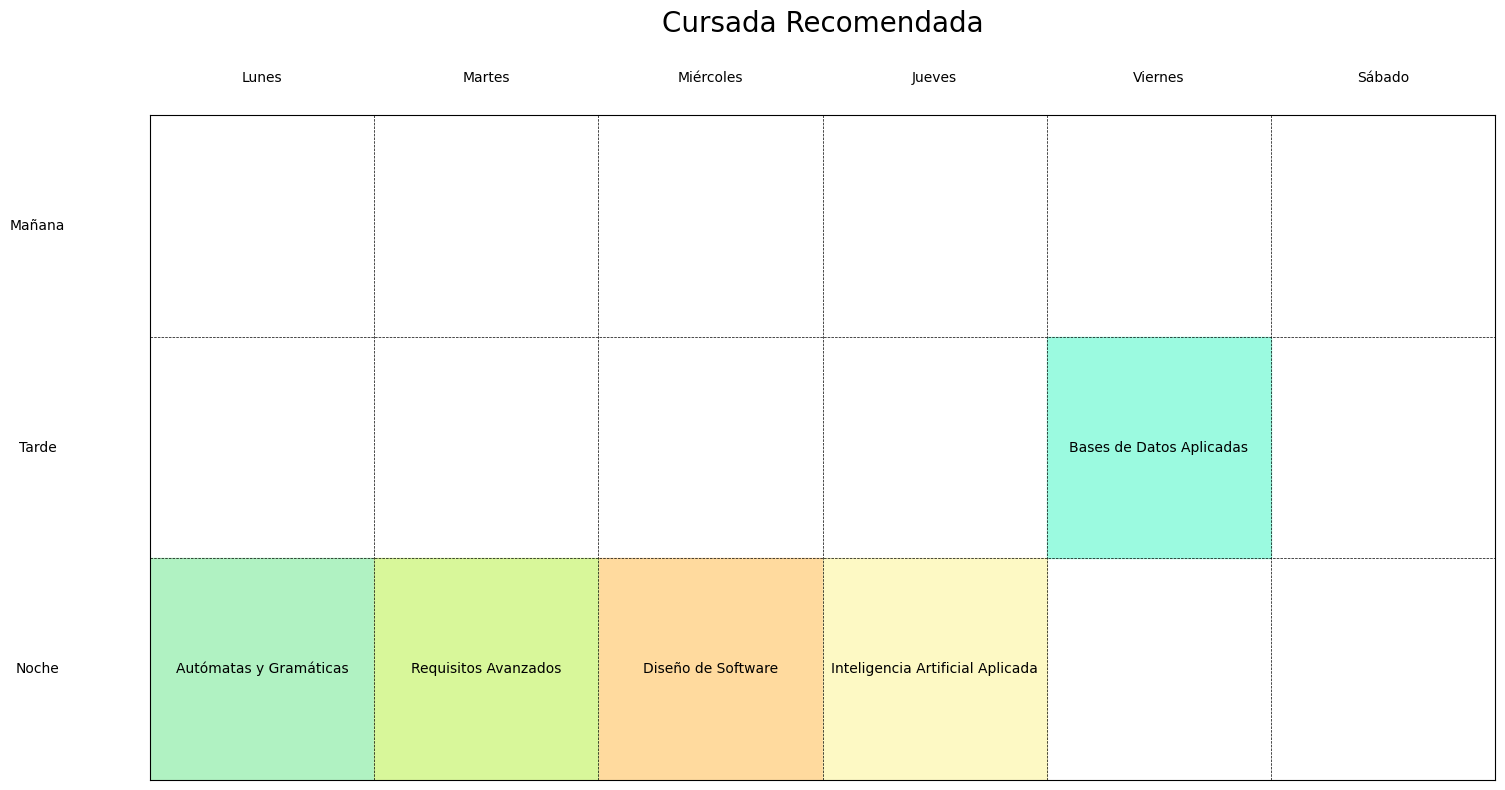

In [ ]:
import matplotlib.pyplot as plt

# Crear un gráfico
fig, ax = plt.subplots(figsize=(15, 8))  # Tamaño de la figura

# Dibujar líneas interiores para separar los horarios
for i in range(1, 3):
    ax.axhline(i, color='black', linestyle='--', linewidth=0.5)

# Dibujar líneas interiores para separar los días de la semana
for i in range(1, 6):
    ax.axvline(i, color='black', linestyle='--', linewidth=0.5)

# Etiquetar los días de la semana arriba del rectángulo
dias_semana = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado']
for i, dia in enumerate(dias_semana):
    ax.text(i + 0.5, 3.15, dia, ha='center')

# Etiquetar los horarios
horarios = ['Mañana', 'Tarde', 'Noche']
for i, horario in enumerate(horarios):
    ax.text(-0.5, 2.5 - i, horario, ha='center', va='center')

# Colores pastel predefinidos
colores = [
    '#bc98f3', '#d3bcf6', '#bae0f5', '#d1eaf9', '#d8f79a', '#ff6565', '#ff9c9c', '#9bfae0',
    '#c3f9ea', '#c3dff9', '#ebf3a0', '#f5fac1', '#ba9df4', '#d0bdf6', '#ffda89', '#ffe4e1',
    '#d8f8e1', '#fcb7af', '#b0f2c2', '#b0c2f2', '#fabfb7', '#fdf9c4', '#ffda9e', '#c5c6c8', '#b2e2f2'
]

random.shuffle(colores)

# Asignar una posición aleatoria para cada materia en el rectángulo
for codigo_horario, (dia, turno) in mejor_individuo.items():
    nombre_materia = mapa_materias.get(codigo_horario, {}).get("nombre", "Materia Desconocida")
    fila = {'Mañana': 2, 'Tarde': 1, 'Noche': 0}[turno]
    columna = dias_semana.index(dia)
    # Calcular el ancho y alto del rectángulo de la celda
    ancho_celda = 1
    alto_celda = 1
    # Obtener el color de la celda según su posición en la lista
    color_celda = colores.pop(0)
    # Dibujar rectángulos para colorear celdas
    ax.add_patch(plt.Rectangle((columna, fila), ancho_celda, alto_celda, color=color_celda, zorder=0))
    # Agregar el nombre de la materia
    ax.text(columna + 0.5, fila + 0.5, nombre_materia, ha='center', va='center', fontsize=10, wrap=True)

# Configurar ejes y etiquetas
ax.set_xlim(0, 6)
ax.set_ylim(0, 3)
ax.set_xticks([])
ax.set_yticks([])

# Ajustar margen superior para dejar espacio para los días de la semana
ax.margins(y=0.5)

# Configurar título
plt.title('Cursada Recomendada', pad=60, fontsize=20)  # Ajustar el espacio entre el título y el gráfico

# Mostrar el gráfico
plt.tight_layout()
plt.show()


Por ahora, la estructura que va a procesar la red va a ser la siguiente:


*   Lista de los codigos de Materia Cursados ese Cuatrimestre
*   Informacion Personal: Si Trabajaba, Horas semanales dedicadas al estudio
*   Exito o Fracaso Global del cuatrimestre




